<font color='#3d59c6'> REGRESIÓN - Índices Mundiales </font>



Introducción

Algoritmos de regresión aplicados a índices macroeconómicos.

Estrategia

* Modelado de Datos
* Análisis de Correlaciones
* Análisis de Componentes Principales
* Creación de Variable categórica y ANOVA
* Identificación de Variables para Modelos de Regresión
* Estimación y Evaluación de los Modelos de Regresión
* Conclusiones
* Optativo: Creación de Datos Sintéticos y Clasificación

# <font color='#3d59c6'>  CARGA DE PACKAGES </font>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import probplot




















# <font color='#3d59c6'>  CARGA DE DATOS </font>

In [3]:
global_indicators = pd.read_csv("/content/Global Economy Indicators.csv")

global_indicators.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


# <font color='#3d59c6'>  LIMPIEZA DE DATOS </font>

In [4]:
global_indicators.columns


Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [5]:

datos = global_indicators.copy()

# Eliminar las columnas especificadas
columnas_a_eliminar = [' CountryID ', ' AMA exchange rate ', ' IMF based exchange rate ', ' Currency ', ' Changes in inventories ',' Gross National Income(GNI) in USD ']
datos = datos.drop(columnas_a_eliminar, axis=1)

# Cambiar los nombres de las columnas a versiones más cortas
nuevos_nombres = {
    ' Country ': 'Country',
    ' Year ': 'Year',
    ' Population ': 'Population',
    ' Per capita GNI ': 'pcGNI',
    ' Agriculture, hunting, forestry, fishing (ISIC A-B) ': 'Agriculture',
    ' Construction (ISIC F) ': 'Construction',
    ' Exports of goods and services ': 'Exports',
    ' Final consumption expenditure ': 'FinalConsumption',
    ' General government final consumption expenditure ': 'GovtConsumption',
    ' Gross capital formation ': 'GrossCapFormation',
    ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ': 'GrossFixedCapFormation',
    ' Household consumption expenditure (including Non-profit institutions serving households) ': 'HouseholdConsumption',
    ' Imports of goods and services ': 'Imports',
    ' Manufacturing (ISIC D) ': 'Manufacturing',
    ' Mining, Manufacturing, Utilities (ISIC C-E) ': 'Mining',
    ' Other Activities (ISIC J-P) ': 'OtherActivities',
    ' Total Value Added ': 'TotalValueAdded',
    ' Transport, storage and communication (ISIC I) ': 'Transport',
    ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ': 'Wholesale',
    ' Gross Domestic Product (GDP) ': 'GDP'

}

datos = datos.rename(columns=nuevos_nombres)




In [6]:
datos.columns

Index(['Country', 'Year', 'Population', 'pcGNI', 'Agriculture', 'Construction',
       'Exports', 'FinalConsumption', 'GovtConsumption', 'GrossCapFormation',
       'GrossFixedCapFormation', 'HouseholdConsumption', 'Imports',
       'Manufacturing', 'Mining', 'OtherActivities', 'TotalValueAdded',
       'Transport', 'Wholesale', 'GDP'],
      dtype='object')

In [7]:
datos = datos[~datos['Country'].isin([' D.P.R. of Korea ', ' China, Macao SAR ', ' Sint Maarten (Dutch part) ', ' Monaco ',  ' Venezuela (Bolivarian Republic of) ', ' Tuvalu ' ])]


In [8]:

datos_pc = datos[['Country', 'Year', 'Population', 'pcGNI']].copy()

# Seleccionar las columnas relevantes para transformación per cápita
columnas_per_capita = ['Agriculture', 'Construction', 'Exports', 'FinalConsumption', 'GovtConsumption',
                       'GrossCapFormation', 'GrossFixedCapFormation', 'HouseholdConsumption', 'Imports',
                       'Manufacturing', 'Mining', 'OtherActivities', 'TotalValueAdded',
                       'Transport', 'Wholesale', 'GDP']

# Aplicar la transformación per cápita a las columnas seleccionadas
for col in columnas_per_capita:
    datos_pc['pc_' + col] = datos[col] / datos['Population']

# Renombrar las columnas según tus especificaciones
nuevos_nombres = {
    'GNI': 'pcGNI',
    'GDP': 'pcGDP'
}

datos_pc = datos_pc.rename(columns=nuevos_nombres)




In [9]:
datos_pc.columns

Index(['Country', 'Year', 'Population', 'pcGNI', 'pc_Agriculture',
       'pc_Construction', 'pc_Exports', 'pc_FinalConsumption',
       'pc_GovtConsumption', 'pc_GrossCapFormation',
       'pc_GrossFixedCapFormation', 'pc_HouseholdConsumption', 'pc_Imports',
       'pc_Manufacturing', 'pc_Mining', 'pc_OtherActivities',
       'pc_TotalValueAdded', 'pc_Transport', 'pc_Wholesale', 'pc_GDP'],
      dtype='object')

In [10]:

# Filtrar los datos desde 2010 hasta 2019
filtrados_pc = datos_pc[(datos_pc['Year'] >= 2010) & (datos_pc['Year'] <= 2019)].copy()



In [11]:

indices_pc = filtrados_pc.drop(['Country', 'Year', 'Population'], axis=1).copy()


La preparación de los datos tiene los siguientes pasos.

Se eliminaron las variables:

*   Country ID no da información relevante a este modelo
*   ' AMA exchange rate ', ' IMF based exchange rate ', ' Currency ', no son variables que en principio pueden ser evaluadas per Cápita.
*   ' Changes in inventories 'tiene muchos valores nulos para muchos de los paises
*   ' Gross National Income(GNI) in USD ', esta variable ya está representada por GNI per capita

Sestá representada por GNI per capita

Se eliminaron los paises a los que por su situación política o tamaño o naturaleza de actividad económica no tienen registros bien sea en agricultura o minería.

*   D.P.R. of Korea
*   Macao SAR
*   Sint Maarten (Dutch part)
*   Venezuela
*   Tuvalu

Se hace un análisis entre los años 2010 y 2019. Periodo económico con relativa uniformidad luego de la crisis inmobiliaria y antes de la pandemia


# <font color='#3d59c6'>  DEFINICIÓN DE VARIABLES </font>

El modelo de regesión está basado en poder predecir el gasto total de los hogares y gobiernos, dado en formato per cápita. Utilizando diferentes variables Macroeconómicas. Cabe resaltar que del modelo se va a quitar las variables country, year.Y la variable población que está intrincica en todos los datos que se van a analizar.

###Variable Objetivo:

**Final Consumption Expenditure per capita:** Gasto total per capita de los hogares, instituciones sin ánimo de lucro y el gobierno en bienes y servicios para consumo final.


###Variables Explicativas:

**Per Capita GNI:** Ingreso Nacional Bruto (INB) per cápita. Medida del ingreso promedio de los residentes de un país.

Per capita:

**Agriculture, Hunting, Forestry, Fishing (ISIC A-B):** Actividad económica relacionada con la agricultura y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Construction (ISIC F):** Actividad económica relacionada con el sector de la construcción y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Exports of Goods and Services:** El valor total de los bienes y servicios que exporta un país.

**Final Consumption Expenditure:** Gasto total de los hogares, instituciones sin ánimo de lucro y el gobierno en bienes y servicios para consumo final.

**General Government Final Consumption Expenditure:** Gasto público en bienes y servicios para consumo final.

**Gross Capital Formation:** Comprende las adquisiciones de activos fijos menos las disposiciones realizadas por unidades institucionales

**Gross Fixed Capital Formation (Including Acquisitions Less Disposals of Valuables):** valor total de las inversiones en activos físicos, teniendo en cuenta las adquisiciones netas y las disposiciones de bienes valiosos realizadas durante un período determinado.

**Household Consumption Expenditure (Including Non-profit Institutions Serving Households):** Gasto, incluyendo el gasto imputado, realizado por hogares residentes en bienes y servicios de consumo individual.

**Imports of Goods and Services:** El valor total de bienes y servicios que un país importa.
**Manufacturing (ISIC D):** Actividad económica relacionada con el sector de la Manufactura y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Mining, Manufacturing, Utilities (ISIC C-E):** Actividad económica relacionada con el sector de la Minería, Manufactura servicios públicos y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Other Activities (ISIC J-P):** Actividades económicas no cubiertas por otras categorías específicas, según la CIIU.

**Total Value Added:** Es una medida de la contribución al PIB realizada por todos los productores, industrias y sectores individuales.

**Transport, Storage, and Communication (ISIC I):** Actividad económica relacionada con el sector del transporte, almacenamiento y comunicaciones y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Wholesale, Retail Trade, Restaurants, and Hotels (ISIC G-H):** Actividad económica relacionada con el sector del Comercio al por mayor y detal, restaurantes y hoteles y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Gross Domestic Product (GDP)**: Producción económica total del país.


# <font color='#3d59c6'>  ANÁLISIS DESCRIPTIVO </font>

In [12]:
indices_pc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 40 to 10509
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pcGNI                      2064 non-null   int64  
 1   pc_Agriculture             2064 non-null   float64
 2   pc_Construction            2064 non-null   float64
 3   pc_Exports                 2064 non-null   float64
 4   pc_FinalConsumption        2064 non-null   float64
 5   pc_GovtConsumption         2064 non-null   float64
 6   pc_GrossCapFormation       2064 non-null   float64
 7   pc_GrossFixedCapFormation  2064 non-null   float64
 8   pc_HouseholdConsumption    2064 non-null   float64
 9   pc_Imports                 2064 non-null   float64
 10  pc_Manufacturing           2064 non-null   float64
 11  pc_Mining                  2064 non-null   float64
 12  pc_OtherActivities         2064 non-null   float64
 13  pc_TotalValueAdded         2064 non-null   flo

In [13]:
indices_pc.describe()

,pcGNI,pc_Agriculture,pc_Construction,pc_Exports,pc_FinalConsumption,pc_GovtConsumption,pc_GrossCapFormation,pc_GrossFixedCapFormation,pc_HouseholdConsumption,pc_Imports,pc_Manufacturing,pc_Mining,pc_OtherActivities,pc_TotalValueAdded,pc_Transport,pc_Wholesale,pc_GDP
count,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000
mean,15276.300388,447.076172,854.174432,9974.833315,11264.027537,2919.383127,3737.789113,3625.363298,8344.220959,9039.148256,2002.584597,3266.000778,6832.893838,14817.979743,1288.961389,2128.342408,15947.018145
std,21587.056654,645.145496,1214.500108,22260.614717,14875.215950,4135.497429,5568.899014,5464.753956,11187.193068,18476.067319,5162.849704,6961.477810,11884.473689,21911.760451,1769.311666,2764.239256,23200.982499
min,221.000000,3.536597,3.518180,16.511815,230.270251,9.383560,17.040974,17.040974,190.570730,66.256259,4.876919,6.177347,18.159403,195.946233,6.837387,12.437947,222.660850
25%,2006.750000,219.075937,106.919267,576.880024,1586.249770,294.253524,493.150819,468.192879,1306.998313,881.999643,177.666214,336.165312,525.225308,1845.310926,165.519162,289.524357,1978.221129
50%,6053.500000,336.630862,370.385593,2159.326467,4846.422476,1068.191129,1506.649184,1452.966062,3779.739887,2714.770822,536.327923,1127.238884,1944.605165,5765.253594,488.000717,826.172458,6214.577611
75%,19186.500000,519.728617,987.223302,9949.594253,15078.284393,3833.284892,4536.872414,4375.878350,10667.036269,10196.083909,1907.918451,2988.122325,7608.381898,18030.082968,1787.731971,2883.161408,19875.134548
max,181179.000000,10069.285816,8201.844692,230655.205953,113566.727841,23570.787202,48626.360496,45373.295962,93185.968945,195169.789652,68661.035895,71297.357705,86748.260515,173575.246871,13197.997860,16306.445900,179465.447218


Se observa que en las variables hay mucha variabilidad de datos, donde la desviación estandar es mayor a la media.

# <font color='#3d59c6'>  ANÁLISIS DE VARIABLES Y COMPONENTES </font>

### <font color='#3d59c6'>  Visualización de la Variable Objetivo </font>

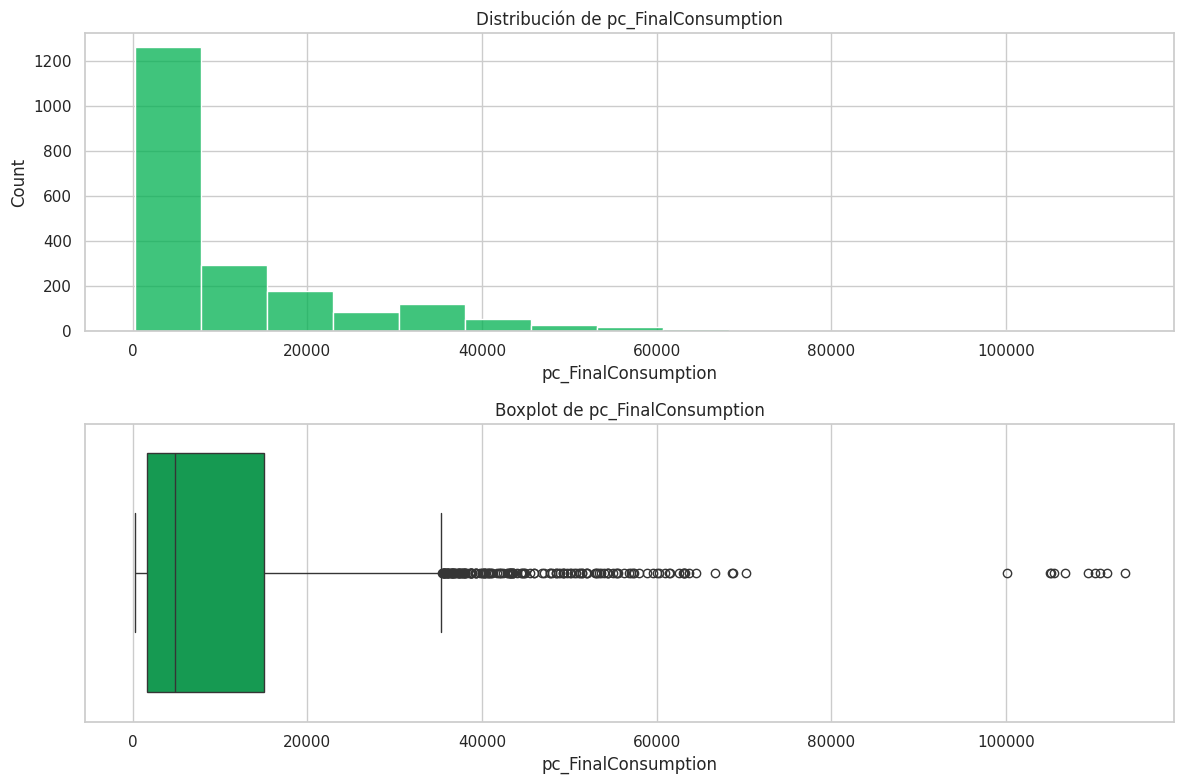

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


variable_seleccionada = 'pc_FinalConsumption'

# Configuración de estilo de seaborn
sns.set(style="whitegrid", palette="pastel")

# Crear figura con dos subgráficos apilados verticalmente
plt.figure(figsize=(12, 8))

# Subgráfico 1: Histograma
plt.subplot(2, 1, 1)
sns.histplot(indices_pc[variable_seleccionada], bins=15, color="#00B050")
plt.title(f'Distribución de {variable_seleccionada}')

# Subgráfico 2: Boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=indices_pc[variable_seleccionada], color="#00B050")
plt.title(f'Boxplot de {variable_seleccionada}')

plt.tight_layout()
plt.show()


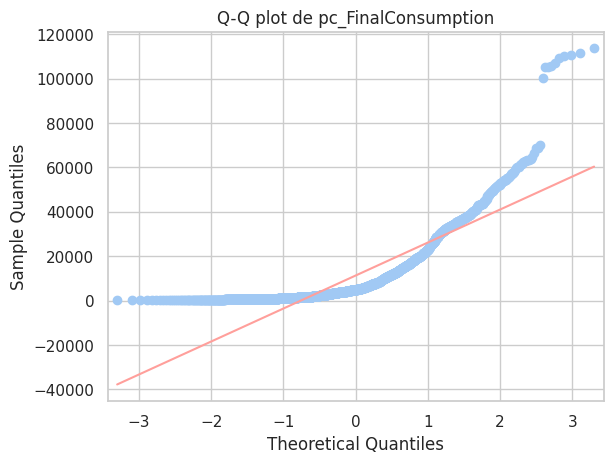

In [15]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Suponiendo que 'indices_pc' es tu DataFrame actual
variable_seleccionada = 'pc_FinalConsumption'

# Crear Q-Q plot para la variable seleccionada
sm.qqplot(indices_pc[variable_seleccionada], line='s')
plt.title(f'Q-Q plot de {variable_seleccionada}')
plt.show()


Se observan muchos outliers y que los datos estan muy centrados en el primer quartíl. Los datos no parecen tener un comportamiento normal ajustado a la linea del qqplot.

### <font color='#3d59c6'>  Visualización de las Variables Explicativas </font>

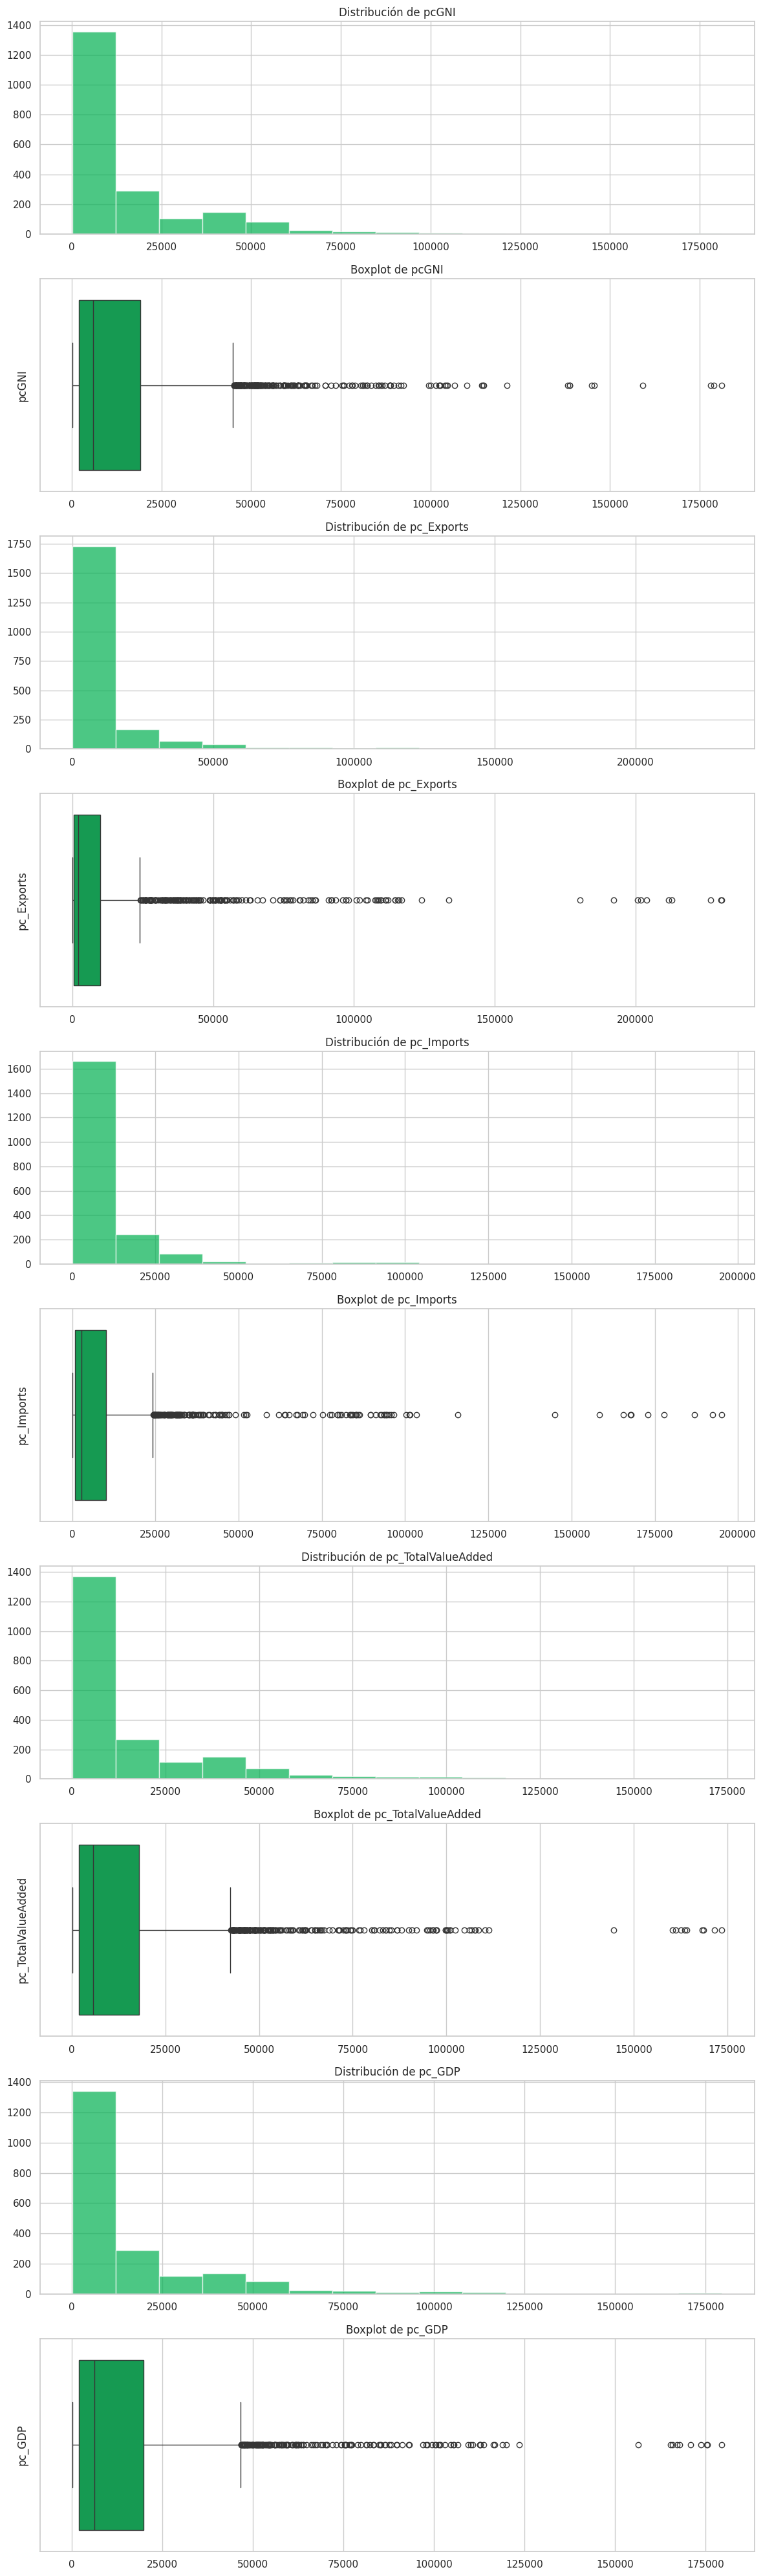

In [16]:
variables_seleccionadas = [
    'pcGNI',
    #'pc_Agriculture',
    #'pc_Construction',
    'pc_Exports',
    #'pc_GovtConsumption',
    #'pc_GrossCapFormation',
    #'pc_GrossFixedCapFormation',
    #'pc_HouseholdConsumption',
    'pc_Imports',
    #'pc_Manufacturing',
    #'pc_Mining',
    #'pc_OtherActivities',
    'pc_TotalValueAdded',
    #'pc_Transport',
    #'pc_Wholesale',
    'pc_GDP'
]

# Configuración de estilo de seaborn
sns.set(style="whitegrid", palette="pastel")

# Crear figura con subgráficos apilados verticalmente
fig, axes = plt.subplots(len(variables_seleccionadas) * 2, 1, figsize=(12, 8 * len(variables_seleccionadas)))

for i, variable in enumerate(variables_seleccionadas):
    # Histograma
    axes[i * 2].hist(indices_pc[variable], bins=15, color="#00B050", alpha=0.7)
    axes[i * 2].set_title(f'Distribución de {variable}')

    # Boxplot
    sns.boxplot(x=indices_pc[variable], color="#00B050", ax=axes[i * 2 + 1], orient='h')
    axes[i * 2 + 1].set_title(f'Boxplot de {variable}')
    axes[i * 2 + 1].set_xlabel('')
    axes[i * 2 + 1].set_ylabel(variable)

plt.tight_layout()
plt.show()


Las variables explicativas tienen un comportamiento muy similar a la variable ogjetivo, asi que visualizamos solo unas cuantas

### <font color='#3d59c6'>  Análisis de Correlación de Variables </font>

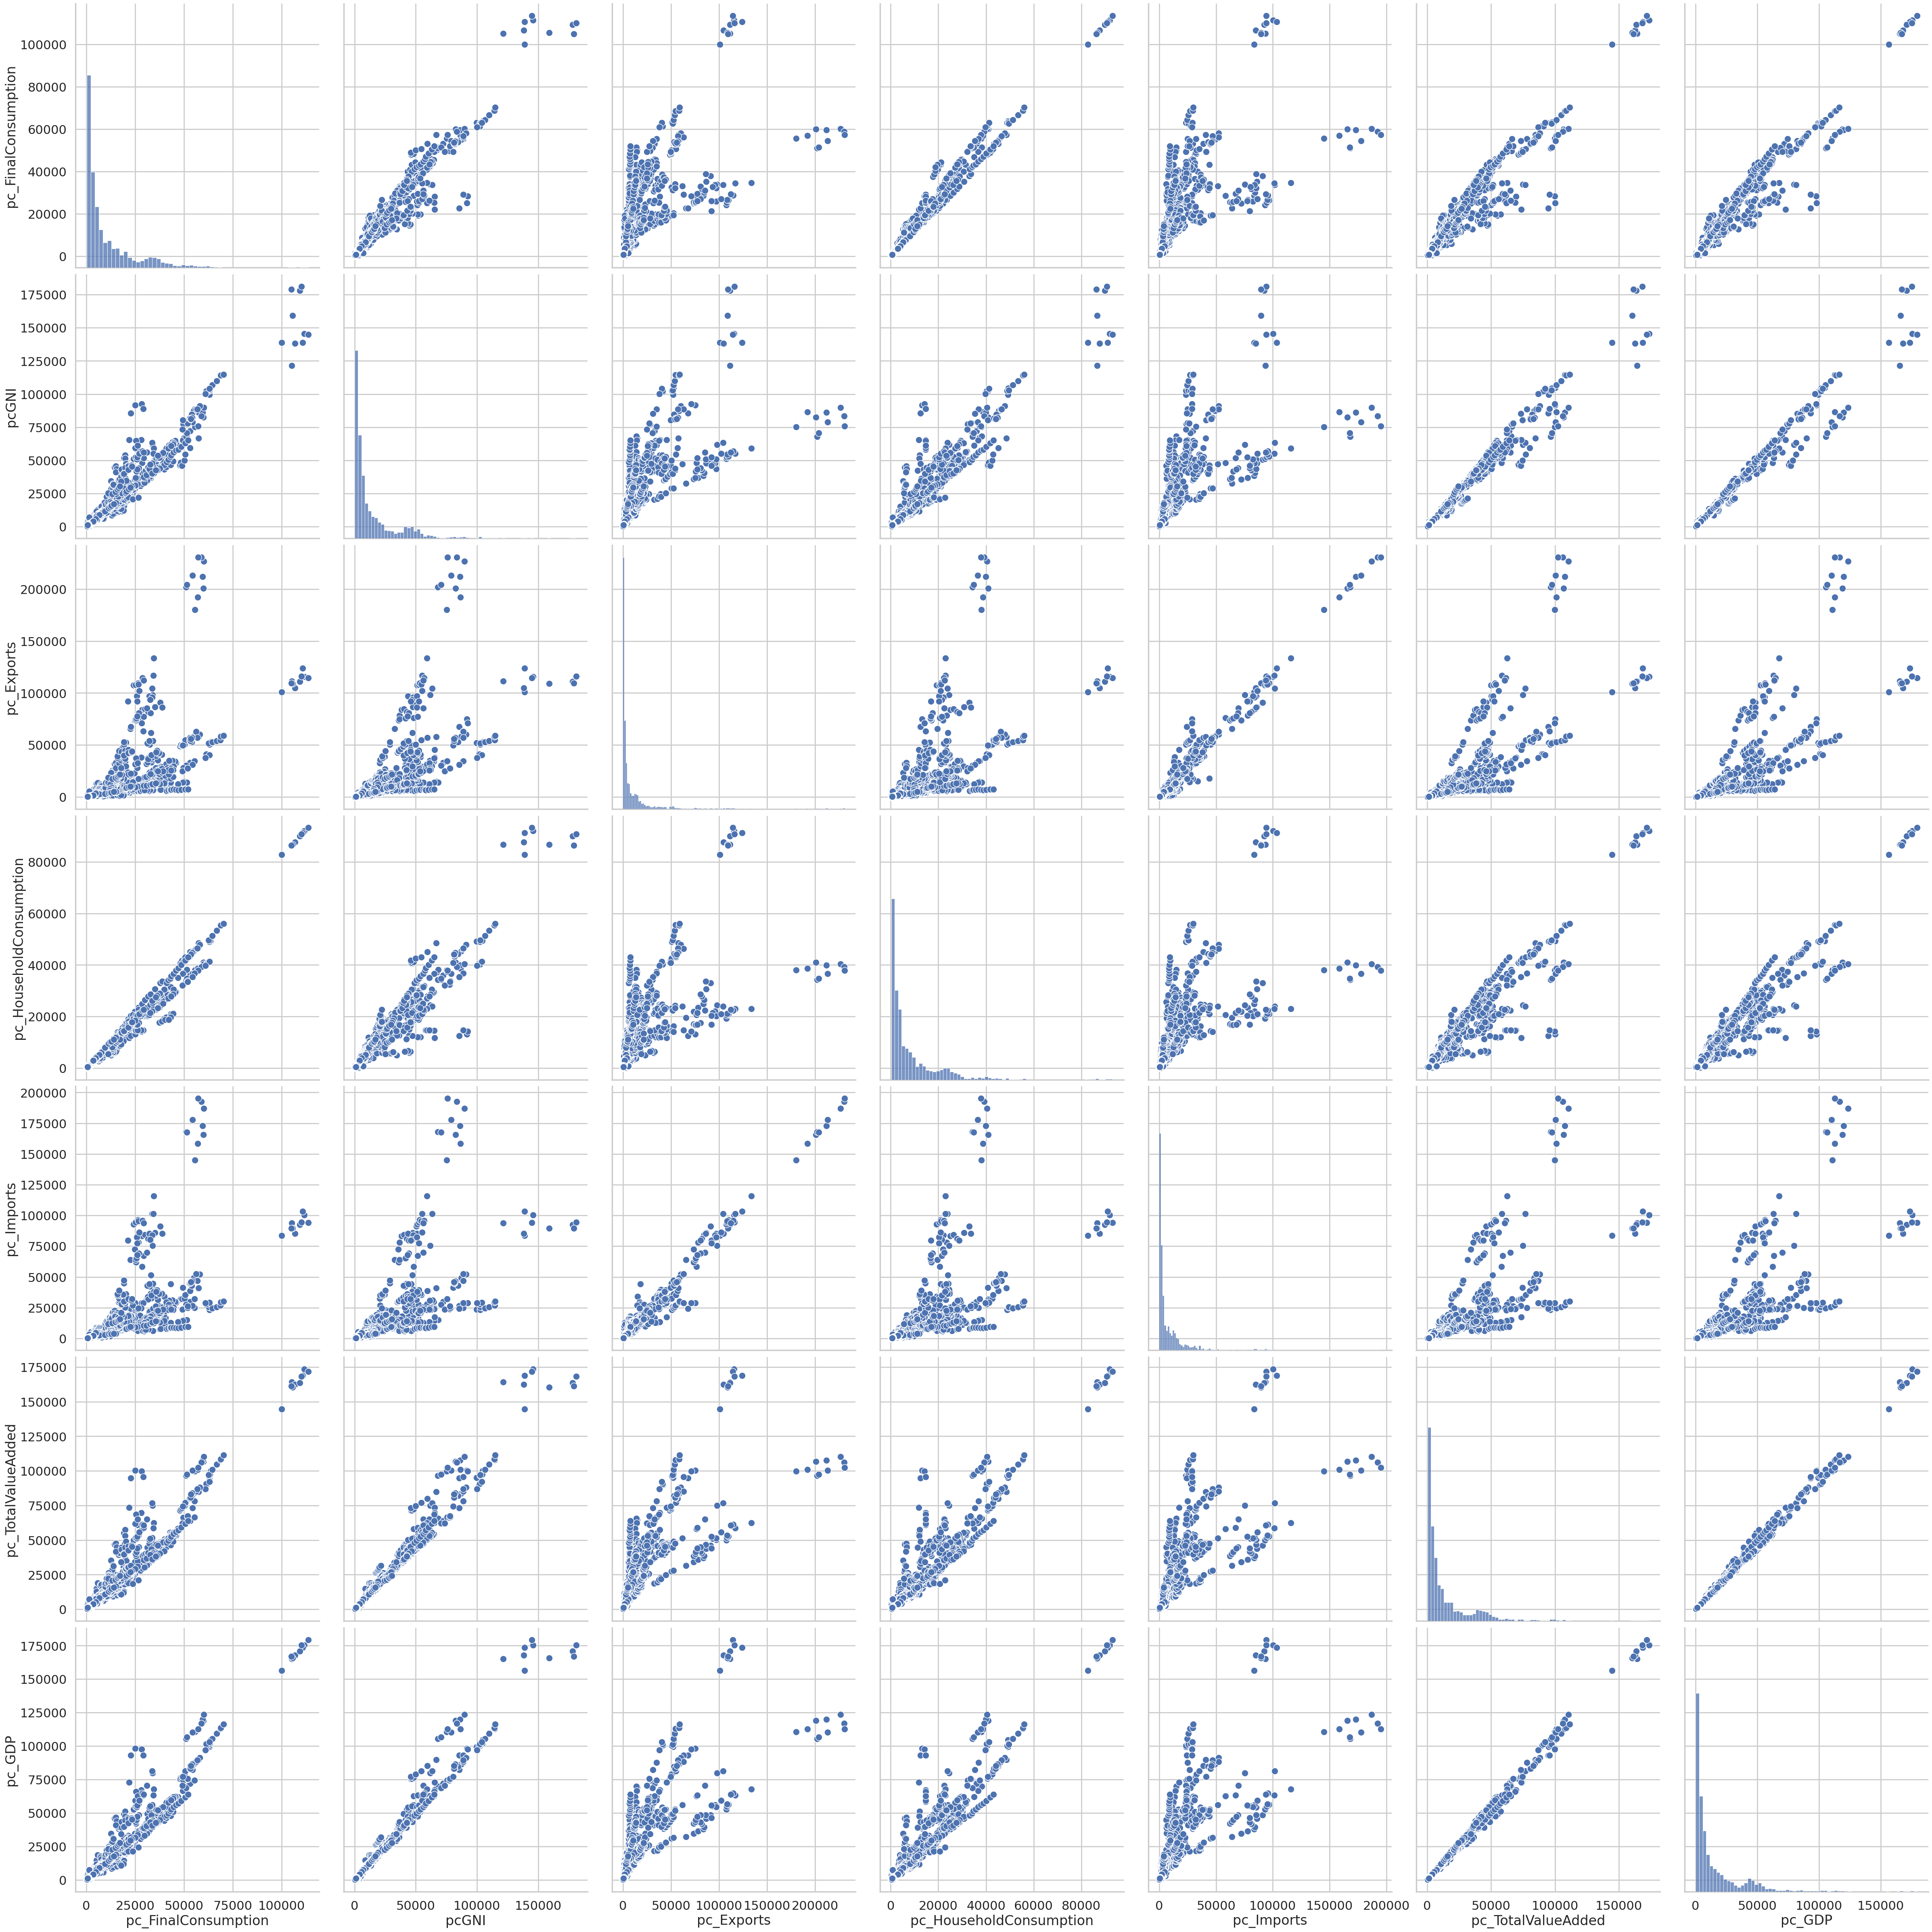

In [17]:

sns.set(style='whitegrid', context='poster')
cols = ['pc_FinalConsumption',
        'pcGNI',
        # 'pc_Agriculture',
        # 'pc_Construction',
        'pc_Exports',
        # 'pc_GovtConsumption',
        # 'pc_GrossCapFormation',
        # 'pc_GrossFixedCapFormation',
        'pc_HouseholdConsumption',
        'pc_Imports',
        # 'pc_Manufacturing',
        # 'pc_Mining',
        # 'pc_OtherActivities',
        'pc_TotalValueAdded',
        # 'pc_Transport',
        # 'pc_Wholesale',
        'pc_GDP'
        ]
sns.pairplot(indices_pc[cols], height=7)
plt.show()

<Axes: >

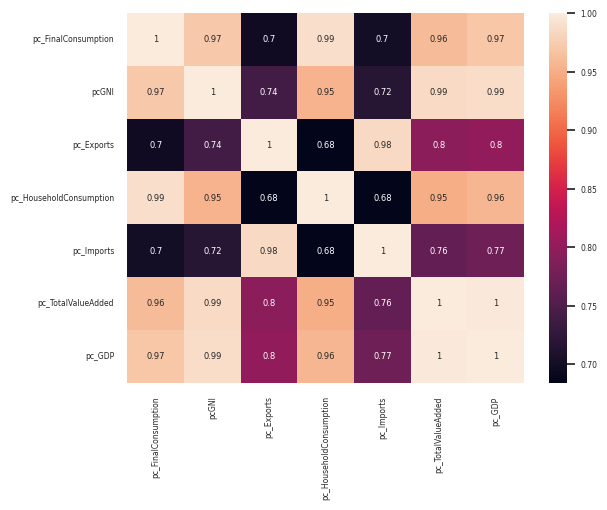

In [18]:
cm = np.corrcoef(indices_pc[cols].values.T)
sns.set(font_scale=0.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

In [19]:
correlation_matrix = indices_pc.corr()

# Seleccionar solo la columna de correlación con la variable objetivo
correlation_with_target = correlation_matrix['pc_FinalConsumption']

# Ordenar los valores de mayor a menor
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Mostrar los valores de correlación ordenados
print(sorted_correlation)


pc_FinalConsumption          1.000000
pc_HouseholdConsumption      0.989482
pcGNI                        0.970400
pc_GDP                       0.969285
pc_TotalValueAdded           0.961116
pc_OtherActivities           0.940209
pc_GovtConsumption           0.920123
pc_GrossFixedCapFormation    0.904418
pc_GrossCapFormation         0.903956
pc_Transport                 0.892802
pc_Construction              0.880390
pc_Wholesale                 0.876504
pc_Manufacturing             0.702628
pc_Imports                   0.699732
pc_Exports                   0.696960
pc_Mining                    0.666248
pc_Agriculture               0.271278
Name: pc_FinalConsumption, dtype: float64


Observamos que la gran mayoría de las variables están altamente correlacionadas con nuestra variable objetivo "pc_FinalConsumption"
Especialmente pc_HouseholdConsumption, pcGNI, pc_GDP, pc_TotalValueAdded

Para el modelo de regresión lineal, se escogió la variable "pc_TotalValueAdded". Esta variable tiene una alta correlación (0.96) con la variable objetivo y además, es un índice que tiene en cuenta la contribución al PIB realizada por todos los productores, industrias y sectores individuales.

### <font color='#3d59c6'>  Análisis de Componentes Principales (PCA)</font>

Para hacer el análisis de PCA, de las 16 variables que se tienen, vamos a seleccionar las variables que por conocimiento del dominio pueden explicar mejor la variable objetivo. Las variables seleccionadas son:

Variable Objetivo: pc_FinalConsumption

Variables Explicativas:
*   pc_HouseholdConsumption
*   pcGNI
*   pc_GDP
*   pc_TotalValueAdded
*   pc_GovtConsumption
*   pc_Imports
*   pc_Exports



In [20]:

# Seleccionar las columnas relevantes
data_pca = indices_pc[['pc_HouseholdConsumption', 'pcGNI', 'pc_GDP', 'pc_TotalValueAdded',
                        'pc_GovtConsumption', 'pc_Imports', 'pc_Exports']]

# Aplicar PCA
pca = PCA()
pca_result = pca.fit_transform(data_pca)

# Obtener loadings (cargas)
loadings = pca.components_.T * (pca.explained_variance_ ** 0.5)

# Crear un DataFrame con los loadings
loadings_df = pd.DataFrame(data=loadings, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)],
                            index=data_pca.columns)

# Obtener la varianza explicada por cada componente
variance_explained = pca.explained_variance_ratio_

# Crear un DataFrame con la varianza explicada
variance_df = pd.DataFrame(data=variance_explained, columns=['Variance Explained'],
                            index=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

print("\nVariance Explained:")
print(variance_df)
print("Loadings (Cargas):")
print(loadings_df)




Variance Explained:
     Variance Explained
PC1            0.887657
PC2            0.102309
PC3            0.005070
PC4            0.003003
PC5            0.001351
PC6            0.000475
PC7            0.000135
Loadings (Cargas):
                                  PC1          PC2          PC3          PC4  \
pc_HouseholdConsumption  10311.715938 -3265.503055 -2575.048949  1111.040618   
pcGNI                    20728.485477 -5686.888967   106.265158 -1776.885534   
pc_GDP                   22801.548577 -4166.935263   327.381192   567.659502   
pc_TotalValueAdded       21474.947831 -4078.777118   974.828410   882.344808   
pc_GovtConsumption        3595.997618 -1007.473378  -286.988971 -1142.831407   
pc_Imports               16158.159287  8740.551439 -1756.160761  -655.547724   
pc_Exports               19892.203058  9880.719938  1274.851609   411.500418   

                                 PC5         PC6         PC7  
pc_HouseholdConsumption   417.593626 -303.133486 -163.493886  
p

OBSERVACIONES: - En total tenemos 7 componentes (= número de variables)


• El componente 1 agrupa un 89% de variación, y los valores absolutos más elevados son:
pc_GDP, pc_TotalValueAdded, pcGNI

• El componente 2 agrupa un 10% de la variación, y los valores absolutos más elevados son :
pc_Exports, pc_Imports

### <font color='#3d59c6'>  Análisis de ANOVA </font>

Para poder hacer un Análisis de ANOVA, se introduce una variable categórica que está directamente asociada al GNI per Cápita. El banco Mundial tiene umbrales en donde clasifica basado en el nivel de ingresos mensual per cápita. El Banco mundial hace 4 clasificaciones. Para este ejemplo, tomaremos dos de esta forma:

*   Nivel de Ingresos Bajo [0]: GNI per cápita <4466
*   Nivel de Ingresos Alto[1]: GNI per cápita >4465

La nueva variable se añadirá al dataset con el nombre de "ingresos" y es de tipo booleano con 0 y 1 descrito anteriormente.

COMPROBACIÓN DE SUPUESTOS -Independencia en las muestras:

 *  Vamos a suponer que las muestras fueron tomadas de forma independiente sin depender de ninguna otra observación.

*   Distribución normal por categorías
*   Homocedasticidad entre grupos


In [21]:
# Crear una copia de indices_pc
indices_anova = indices_pc.copy()

# Añadir la columna "ingresos" según la condición dada
indices_anova['ingresos'] = indices_anova['pcGNI'].apply(lambda x: 1 if x > 4465 else 0)

# Reorganizar las columnas moviendo "ingresos" al final
column_order = ['pcGNI',
        'pc_Agriculture',
        'pc_Construction',
        'pc_Exports',
        'pc_GovtConsumption',
        'pc_GrossCapFormation',
        'pc_GrossFixedCapFormation',
        'pc_HouseholdConsumption',
        'pc_Imports',
        'pc_Manufacturing',
        'pc_Mining',
        'pc_OtherActivities',
        'pc_TotalValueAdded',
        'pc_Transport',
        'pc_Wholesale',
        'pc_GDP',
        'pc_FinalConsumption',
        'ingresos'
        ]
indices_anova = indices_anova[column_order]




<Figure size 4000x2600 with 0 Axes>

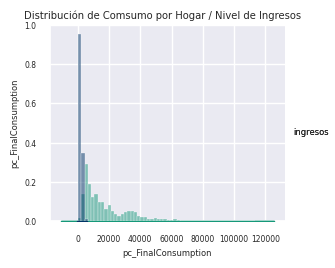

In [22]:
# Seleccionar las variables de interés
data_anova = indices_anova[['ingresos', 'pc_FinalConsumption']]

# Configurar el estilo y tamaño de la visualización
sns.set(font_scale=0.5)
plt.figure(figsize=(40, 26))

# Crear el pairplot con seaborn
pair_plot = sns.pairplot(data_anova, hue='ingresos', palette={0: "#003366", 1: "#159879"})

# Ajustar las propiedades del gráfico
pair_plot.fig.suptitle("Distribución de Comsumo por Hogar / Nivel de Ingresos", y=1.02)
pair_plot.map_upper(sns.scatterplot)
pair_plot.map_diag(sns.histplot)
pair_plot.add_legend()


# Mostrar la visualización
plt.show()


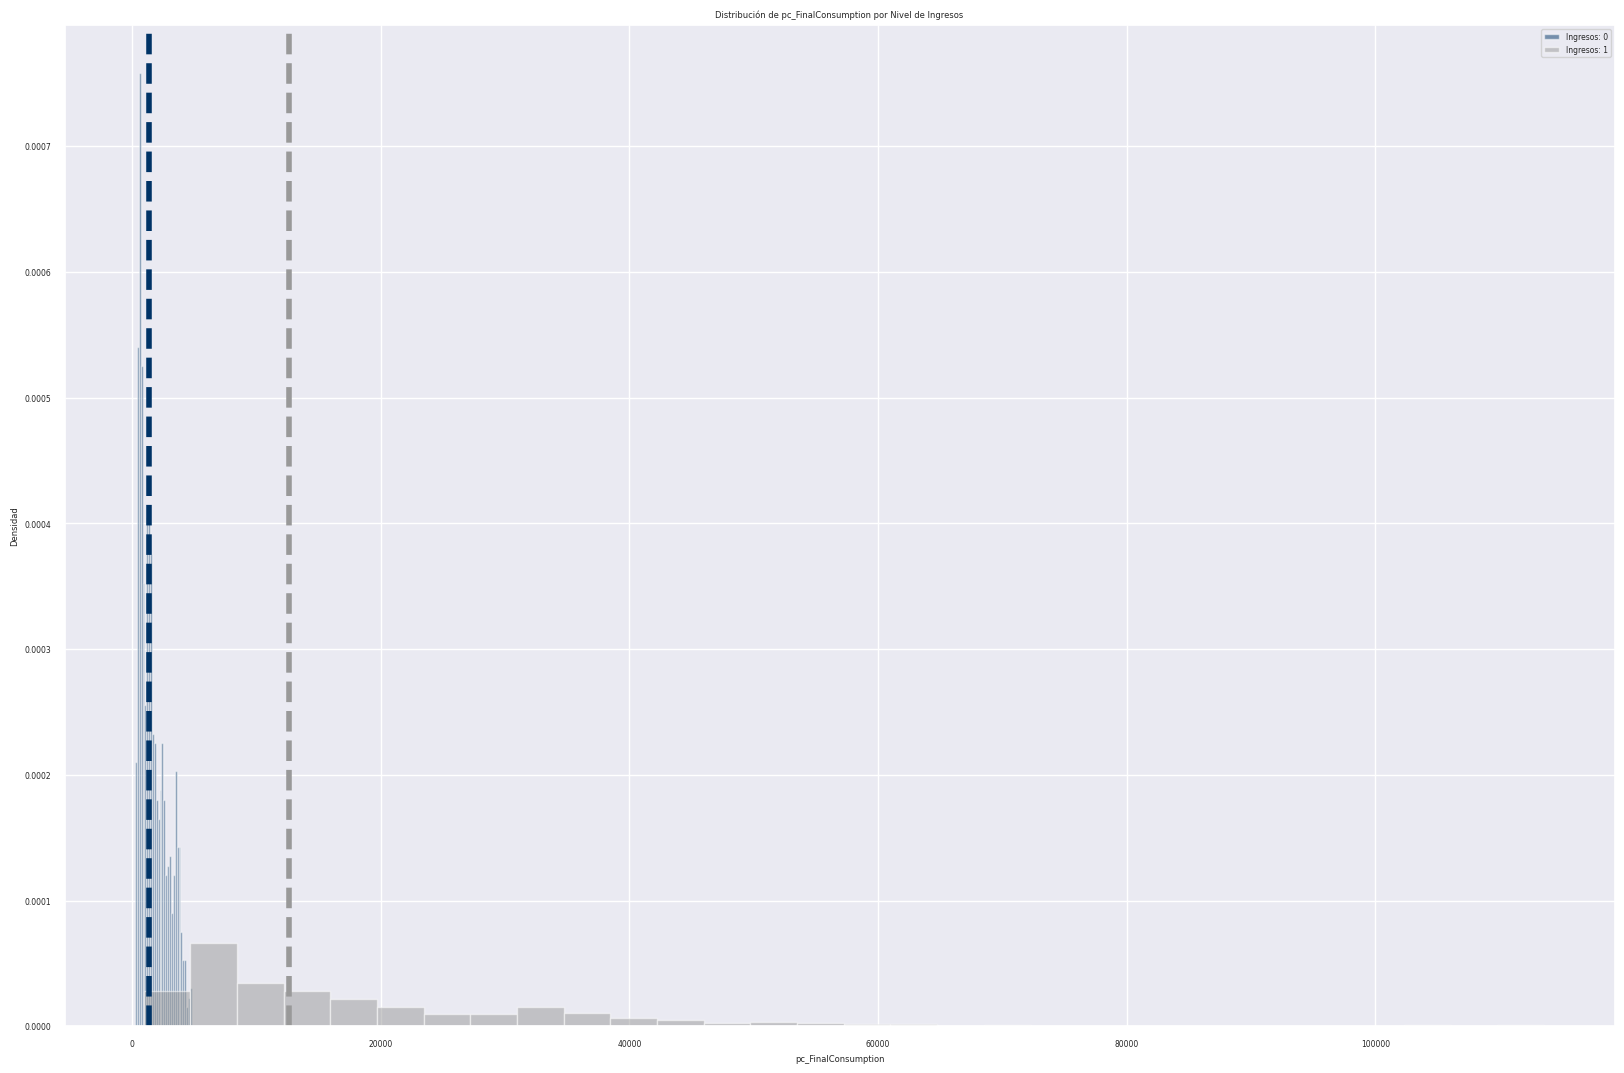

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar el tamaño de la visualización
plt.figure(figsize=(20, 13))

# Histograma probabilístico con la distribución 'pc_FinalConsumption' por grupo 'ingresos'
plt.hist(data_anova[data_anova['ingresos'] == 0]['pc_FinalConsumption'],
         bins=30, alpha=0.5, color='#003366', label='Ingresos: 0', density=True)

plt.hist(data_anova[data_anova['ingresos'] == 1]['pc_FinalConsumption'],
         bins=30, alpha=0.5, color='#999999', label='Ingresos: 1', density=True)

# Leyenda
plt.legend(loc='upper right')

# Mediana 'pc_FinalConsumption' por grupo
plt.axvline(np.median(data_anova[data_anova['ingresos'] == 0]['pc_FinalConsumption']),
            color='#003366', linestyle='dashed', linewidth=4)

plt.axvline(np.median(data_anova[data_anova['ingresos'] == 1]['pc_FinalConsumption']),
            color='#999999', linestyle='dashed', linewidth=4)

# Configurar etiquetas y título
plt.title('Distribución de pc_FinalConsumption por Nivel de Ingresos')
plt.xlabel('pc_FinalConsumption')
plt.ylabel('Densidad')

# Mostrar la visualización
plt.show()


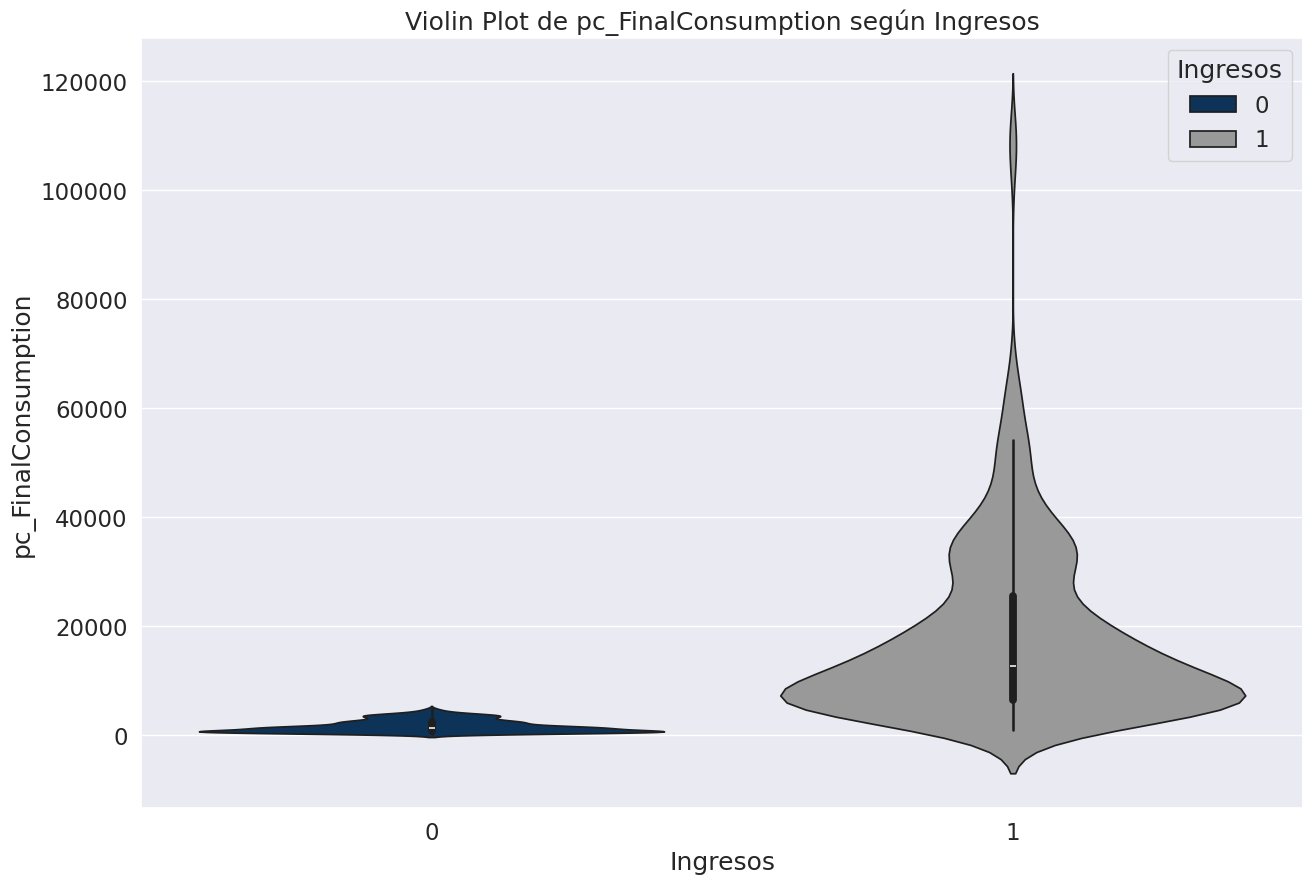

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables de interés
data_anova = indices_anova[['ingresos', 'pc_FinalConsumption']]

# Configurar el estilo y tamaño de la visualización
sns.set(font_scale=1.5)
plt.figure(figsize=(15, 10))

# Crear el gráfico de violín con Seaborn
sns.violinplot(x='ingresos', y='pc_FinalConsumption', data=data_anova, hue='ingresos', palette={0: "#003366", 1: "#999999"}, inner="box")

# Ajustar las propiedades del gráfico
plt.title("Violin Plot de pc_FinalConsumption según Ingresos")
plt.xlabel("Ingresos")
plt.ylabel("pc_FinalConsumption")
plt.legend(title='Ingresos')

# Mostrar la visualización
plt.show()


Visualmente se observa que la variable ingresos tiene influencia considerable sobre la variable objetivo Final_consumption.
Pareciera que, como se espera, el consumo per cápita aumenta cuando se está en un nivel de ingresos Alto [1]




In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Crear un modelo de ANOVA
modelo_anova = ols('pc_FinalConsumption ~ C(ingresos)', data=indices_anova).fit()

# Realizar ANOVA
tabla_anova = sm.stats.anova_lm(modelo_anova)

# Imprimir la tabla ANOVA
print(tabla_anova)


                 df        sum_sq       mean_sq           F         PR(>F)
C(ingresos)     1.0  1.394030e+11  1.394030e+11  906.546918  2.191156e-165
Residual     2062.0  3.170812e+11  1.537736e+08         NaN            NaN


ANOVA muestra que hay diferencias significativas entre los grupos definidos por la variable ingresos, ya que el valor p asociado al estadístico F es muy bajo.

#### <font color='#3d59c6'>  *Normalidad:* </font>
Prueba estadística: Prueba de Shapiro-wilk.

H0: La variable presenta una distribución normal

H1: La variable presenta una distribución no normal

p valor > 0.05: No rechazar H0
p valor < 0.05: Rechazar H0


In [26]:
import pandas as pd
from scipy.stats import shapiro

# Seleccionar las variables de interés
variables = ['pc_FinalConsumption']
categorias = ['0', '1']

resultados = pd.DataFrame(columns=['Variable', 'Cat', 'Shapiro', 'PValor'])

for variable in variables:
    for cat in categorias:
        data_subset = indices_anova[indices_anova['ingresos'] == int(cat)][variable]
        _, p_value = shapiro(data_subset)
        resultados = pd.concat([resultados, pd.DataFrame({
            'Variable': [variable],
            'Cat': [cat],
            'Shapiro': [p_value],
            'PValor': [round(p_value, 5)]
        })])

print(resultados)


              Variable Cat       Shapiro  PValor
0  pc_FinalConsumption   0  2.272716e-22     0.0
0  pc_FinalConsumption   1  4.152085e-36     0.0


Los valores de p Valor no pasan la prueba de normalidad al ser p<0.05.

#### <font color='#3d59c6'>  *Homocedasticidad:* </font>

In [27]:
from scipy.stats import bartlett

# Seleccionar las variables de interés
variables = ['pc_FinalConsumption']

resultados_bartlett = pd.DataFrame(columns=['Variable', 'Estadistico', 'PValor'])

for variable in variables:
    resultado_bartlett = bartlett(indices_anova[variable], indices_anova['ingresos'])
    resultados_bartlett = pd.concat([resultados_bartlett, pd.DataFrame({
        'Variable': [variable],
        'Estadistico': [resultado_bartlett.statistic],
        'PValor': [resultado_bartlett.pvalue]
    })])

print(resultados_bartlett)


              Variable   Estadistico  PValor
0  pc_FinalConsumption  39678.661574     0.0


El estadístico de Bartlett es significativamente alto, y el valor p es cercano a cero. Por lo tanto, las varianzas de FinalConsumption son diferentes

# <font color='#3d59c6'>  MODELOS DE REGRESIÓN </font>

## <font color='#3d59c6'>  Regresión Lineal



 </font>

#### <font color='#3d59c6'>  *Modelo:*
 </font>

In [28]:
# Seleccionando las variables, tanto las X como las Y con una única variable independiente
X = indices_pc[['pc_TotalValueAdded']]
y = indices_pc['pc_FinalConsumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Algoritmo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicción y evaluación
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean squared error: 20894051.263048824
Root Mean Squared Error: 4571.001122626073
R-squared: 0.8853464956328955


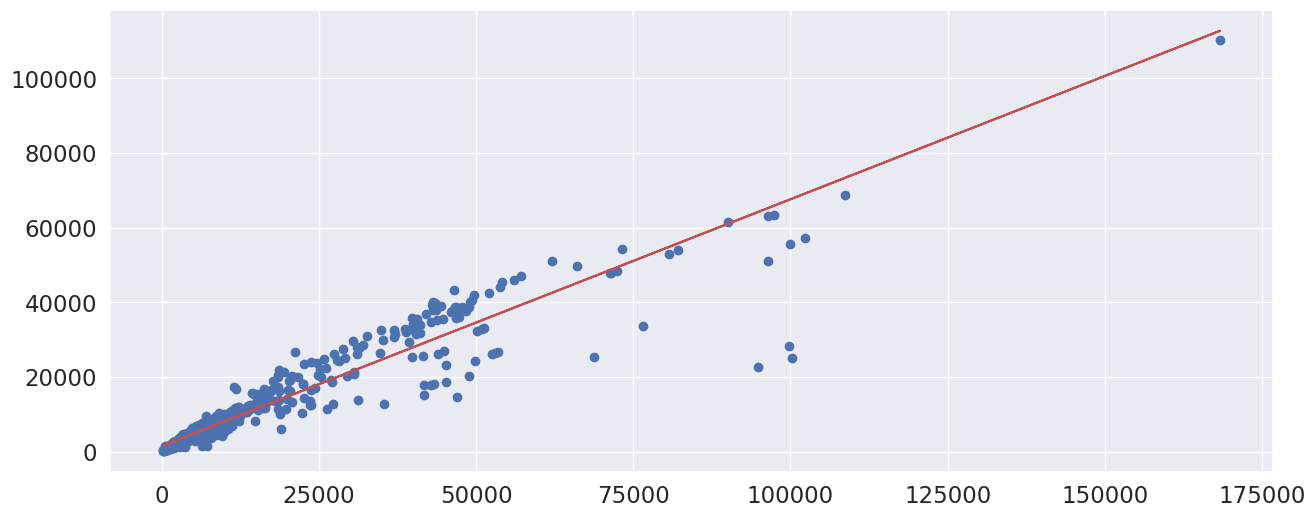

In [29]:
plt.figure(figsize = (15, 6))
plt.scatter(X_test, y_test, label = "Testing points")
plt.plot(X_test, y_pred, label = "Predicted points", c = 'r')
plt.show()

In [30]:
# Después de ajustar el modelo
beta_0 = regressor.intercept_
beta_1 = regressor.coef_[0]

# Imprimir la ecuación de la recta
print(f'Ecuación de la recta: pc_FinalConsumption = {beta_0} + {beta_1} * pc_TotalValueAdded')

Ecuación de la recta: pc_FinalConsumption = 1604.7388832137203 + 0.6600661879317066 * pc_TotalValueAdded


El modelo tiene un
R2 de 0.89, es decir que 89% de la variabilidad en la variable objetivo puede ser explicada por
el modelo de regresion lineal. Lo cual no es óptimo, pero puede ser una buena aproximación inicial a un modelo con
mayor porcentaje de explicabilidad.

El Root Mean squared error nos da la diferencia promedio entre los valores predichos por el modelo y los valores reales. Si tomamos las unidades del pc_FinalConsumption en (USD per cápita), habría una variación per capita de 4,571 USD. Con un valor de la media de la variable objetivo de 11,264USD, el modelo no es del todo acertado.

### <font color='#3d59c6'>  Análisis de Residuos </font>

#### <font color='#3d59c6'>  *Normalidad:*
 </font>

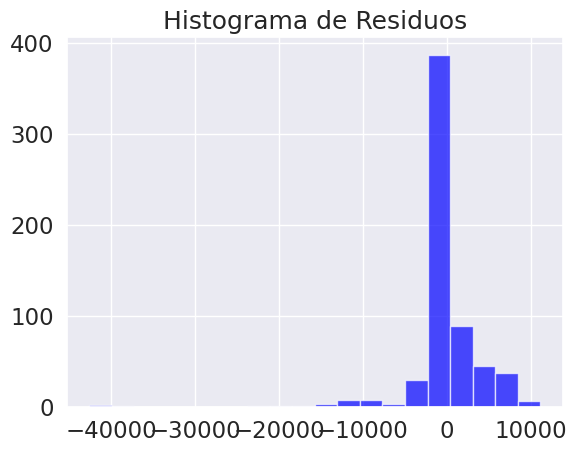

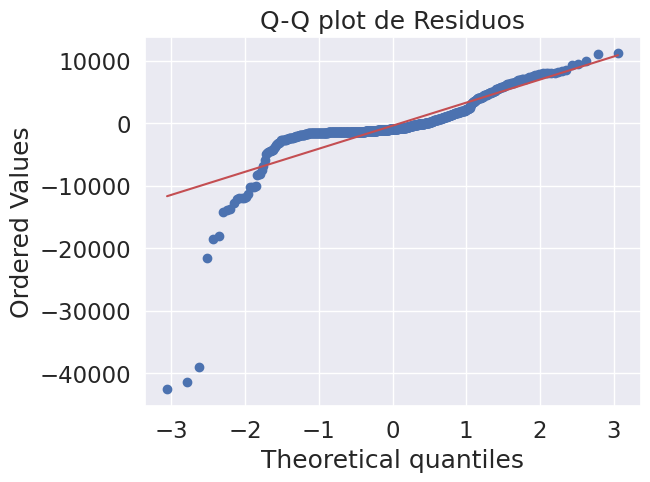

In [31]:


# Calcular los residuos
residuos = y_test - y_pred

# Histograma de residuos
plt.hist(residuos, bins=20, color='blue', alpha=0.7)
plt.title('Histograma de Residuos')
plt.show()

# Q-Q plot de residuos
probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q plot de Residuos')
plt.show()

In [32]:
from scipy.stats import shapiro

# Prueba de normalidad de Shapiro-Wilk
stat, p_value = shapiro(residuos)

# Imprime los resultados
print(f"Estadístico W = {stat:.5f}, p-value = {p_value:.2e}")


Estadístico W = 0.65688, p-value = 1.87e-33


El test de Shapiro-Wilk indica que los residuos del modelo no se distribuyen normal. Habria que observar los outliers y ver si tienen alguna influencia negativa sobre el modelo de  regresión lineal


#### <font color='#3d59c6'>  *Homocedasticidad:*
 </font>

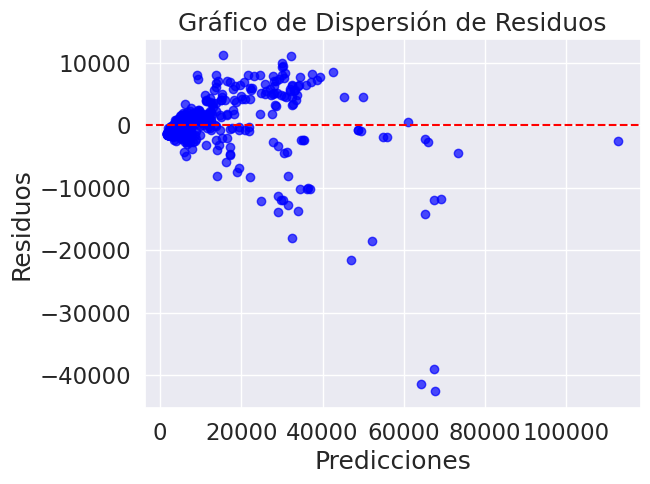

In [33]:
# Gráfico de dispersión de residuos
plt.scatter(y_pred, residuos, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()


In [34]:
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Seleccionando las variables
X = indices_pc[['pc_TotalValueAdded']]
y = indices_pc['pc_FinalConsumption']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Añadir una columna constante a las variables independientes
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ajustar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicción y evaluación
y_pred = regressor.predict(X_test)
residuos = y_test - y_pred

# Test de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_test)

# Imprimir los resultados
names = ['Lagrange Multiplier statistic', 'LM test p-value', 'F-statistic', 'F-test p-value']
print(list(zip(names, bp_test)))


[('Lagrange Multiplier statistic', 114.5121190613298), ('LM test p-value', 1.006492400982051e-26), ('F-statistic', 140.00036845292436), ('F-test p-value', 2.9348790204044826e-29)]


 El p-value del LM test, es muy cercano a cero (2.9e-29). Es decir la varianza de los errores es constante a lo largo de todas las observaciones. Lo que sugiere que hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad.

#### <font color='#3d59c6'>  *Autocorrelación:*
 </font>

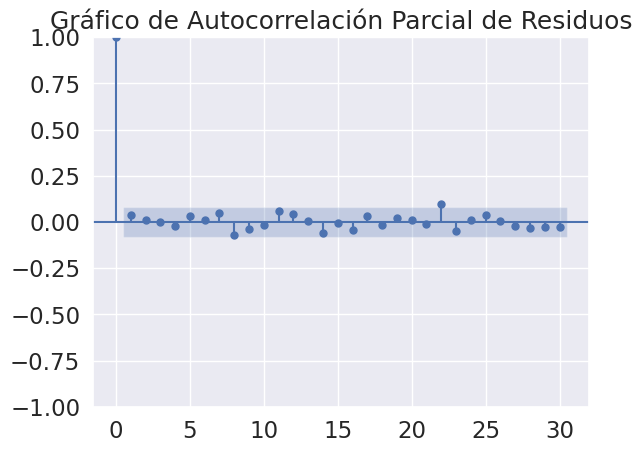

In [35]:
# Añadir una columna constante a las variables independientes
X_test_const = sm.add_constant(X_test)

# Obtener los residuos
residuos = y_test - y_pred

# Gráfico de autocorrelación parcial (PACF) de los residuos
sm.graphics.tsa.plot_pacf(residuos, lags=30, alpha=0.05)
plt.title('Gráfico de Autocorrelación Parcial de Residuos')
plt.show()

In [36]:
from statsmodels.stats.stattools import durbin_watson


y_pred = regressor.predict(X_test)
residuals = y_test - y_pred

# Test de Durbin-Watson
dw_statistic = durbin_watson(residuals)

# Imprimir resultado
print(f'Durbin-Watson Statistic: {dw_statistic}')



Durbin-Watson Statistic: 1.9044930662097053


 Cierta evidencia de autocorrelación positiva en los residuos ya que el valor del estadistico Durbin-Watson (1.9) es menor a "2"

#### <font color='#3d59c6'>  *Outliers:*
 </font>

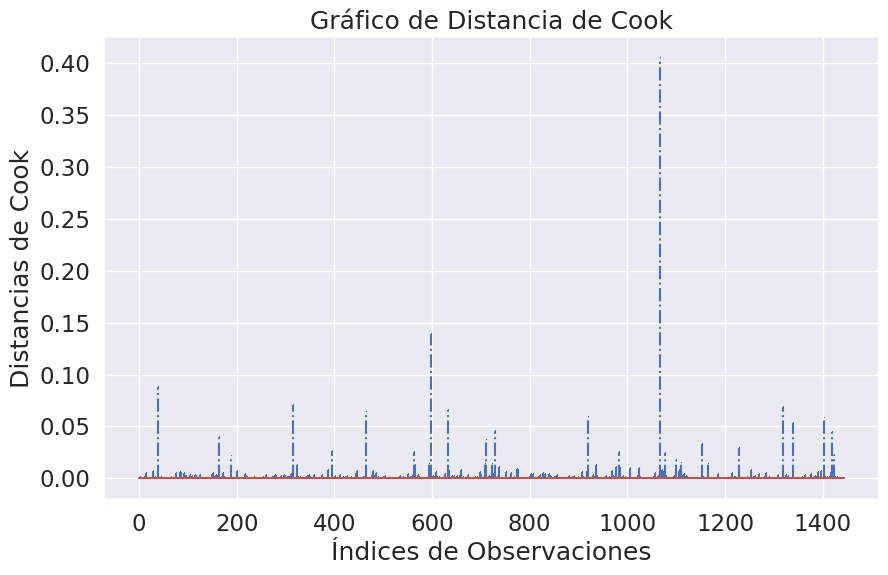

In [37]:

# Predicciones en el conjunto de entrenamiento
y_pred_train = regressor.predict(X_train)

# Crear un modelo OLS
modelo_ols = OLS(y_train, X_train).fit()

# Residuos
residuos = modelo_ols.resid

# Calcular distancias de Cook
influence = OLSInfluence(modelo_ols)
cook_distances = influence.cooks_distance[0]

# Gráfico de distancia de Cook
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.stem(cook_distances, markerfmt=",", linefmt="-.")
plt.title('Gráfico de Distancia de Cook')
plt.xlabel('Índices de Observaciones')
plt.ylabel('Distancias de Cook')
plt.show()


Se observan algunos outliers, pero en general las distancias de Cook no arrojan valores alarmantes.

## <font color='#3d59c6'>  Regresión Lineal Multivariable </font>

### <font color='#3d59c6'>  *Modelo*
 </font>

Luego de utilizar correlaciones, PCA y ANOVA para analizar las variables dependientes y objetivo,se proponen las siguientes variables como las escogidas para generar el modelo de regresion lineal multivariable.

Correlación: Variable **pc_TotalValueAdded** presentó alta correlación con la variable objetivo

PCA Components: **pc_TotalValueAdded**, fue una de las de mayor peso en la componente 1. **pc_Exports** fue la de mayor peso en la componente 2.

ANOVA **ingresos**, la variable categórica que tiene influencia directa sobre la variable objetivo


<Figure size 2000x1300 with 0 Axes>

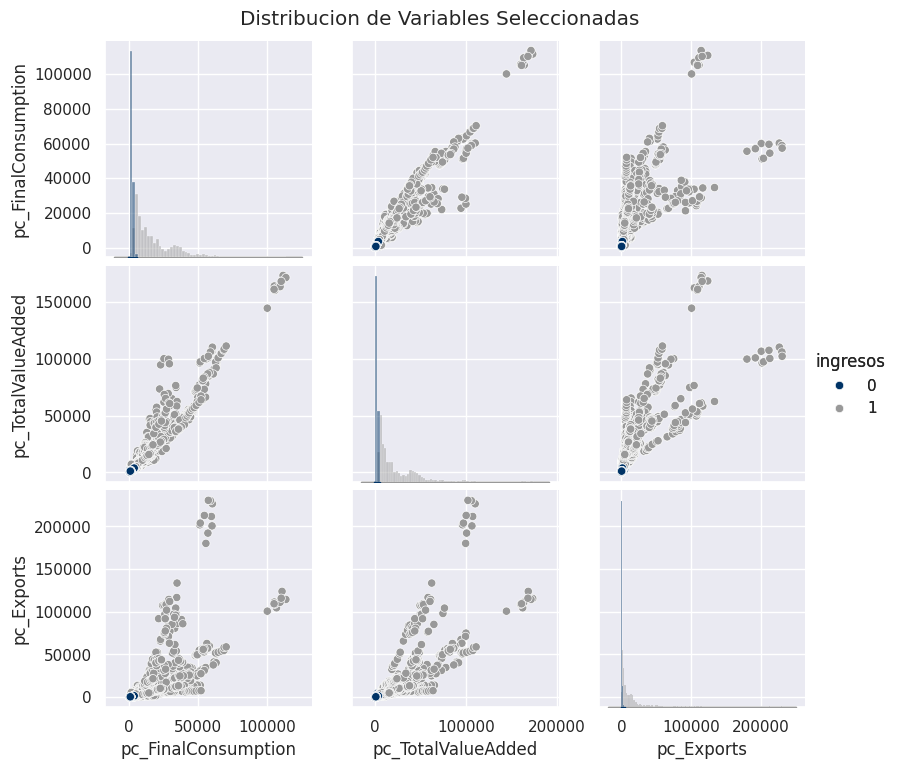

In [38]:


# Variables seleccionadas
data_model = indices_anova[['pc_FinalConsumption', 'ingresos', 'pc_TotalValueAdded', 'pc_Exports']]

# Configurar el estilo y tamaño de la visualización
sns.set(font_scale=1)
plt.figure(figsize=(20, 13))

# Crear el pairplot con seaborn
pair_plot = sns.pairplot(data_model, hue='ingresos', palette={0: "#003366", 1: "#999999"})

# Ajustar las propiedades del gráfico
pair_plot.fig.suptitle("Distribucion de Variables Seleccionadas", y=1.02)
pair_plot.map_upper(sns.scatterplot)
pair_plot.map_diag(sns.histplot)
pair_plot.add_legend()

# Mostrar la visualización
plt.show()


Luego de hacer una visualización de las variables, nuevamente confirmamos lo que se habia observado anteriormente. Alta influencia de la variable categórica "ingresos" y cierta correlación de las variabes explicativas y la objetivo

In [39]:
X_multivariable = indices_anova[['ingresos', 'pc_TotalValueAdded', 'pc_Exports']]
y_multivariable = indices_anova['pc_FinalConsumption']
X_train_multivariable, X_test_multivariable, y_train_multivariable, y_test_multivariable = train_test_split(X_multivariable, y_multivariable, test_size=0.3, random_state=42)

modelo_regresion_multivariable = LinearRegression()
modelo_regresion_multivariable.fit(X_train_multivariable, y_train_multivariable)

y_prediccion_multivariable = modelo_regresion_multivariable.predict(X_test_multivariable)
mse_multivariable = mean_squared_error(y_test_multivariable, y_prediccion_multivariable)
rmse_multivariable = np.sqrt(mse_multivariable)
r2_multivariable = r2_score(y_test_multivariable, y_prediccion_multivariable)

print('Regresión Multivariable:')
print('Error cuadrático medio:', mse_multivariable)
print('Raíz del Error Cuadrático Medio:', rmse_multivariable)
print('Coeficiente de Determinación (R-squared):', r2_multivariable)

Regresión Multivariable:
Error cuadrático medio: 17310636.684344225
Raíz del Error Cuadrático Medio: 4160.605326673539
Coeficiente de Determinación (R-squared): 0.9050100368904612


In [40]:
# Obtener los coeficientes de la regresión multivariable
coeficientes_multivariable = modelo_regresion_multivariable.coef_
interseccion_multivariable = modelo_regresion_multivariable.intercept_

# Imprimir los coeficientes y la intersección para la regresión multivariable
print('Intersección (beta_0):', interseccion_multivariable)
print('Coeficientes (beta_1, beta_2, beta_3):', coeficientes_multivariable)

Intersección (beta_0): 463.8090643809046
Coeficientes (beta_1, beta_2, beta_3): [ 2.13316529e+03  7.32296053e-01 -1.20724513e-01]


pc_FinalConsumption=β0 + β1 x ingresos + β2 x pc_TotalValueAdded + β3 x pc_Exports+ε

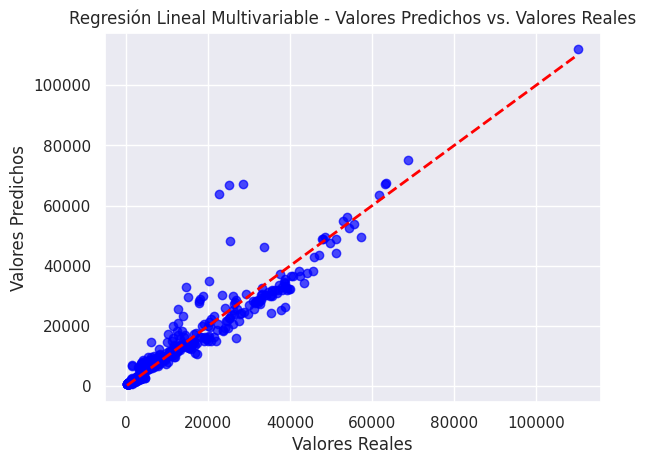

In [41]:
import matplotlib.pyplot as plt

# Gráfico de dispersión para la regresión multivariable
plt.scatter(y_test_multivariable, y_prediccion_multivariable, color='blue', alpha=0.7)
plt.plot([min(y_test_multivariable), max(y_test_multivariable)], [min(y_test_multivariable), max(y_test_multivariable)], linestyle='--', color='red', linewidth=2)

# Ajustes del gráfico
plt.title('Regresión Lineal Multivariable - Valores Predichos vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# Mostrar el gráfico
plt.show()



El modelo lineal multivariable tiene un R2 de 0.91, es decir que 91% de la variabilidad en la variable objetivo puede ser explicada por
el modelo de regresión lineal multivariable. Lo cual se aproxima bastante a la ecuación de la función deseada o "exacta"

El Root Mean squared error nos da la diferencia promedio entre los valores predichos por el modelo y los valores reales. Si tomamos las unidades del pc_FinalConsumption en (USD per cápita), habría una variación per capita de 4,160USD. Con un valor de la media de la variable objetivo de 11,264USD, el modelo tampoco es del todo acertado, pero el RMS es mejor que el de regresión lineal de una variable

### <font color='#3d59c6'>  Análisis de Residuos </font>

#### <font color='#3d59c6'>  *Normalidad:*
 </font>

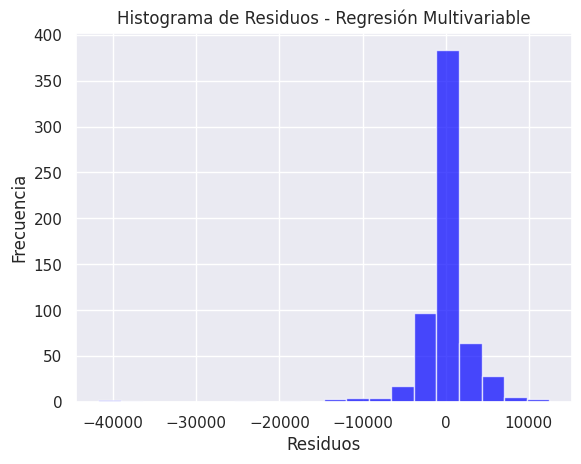

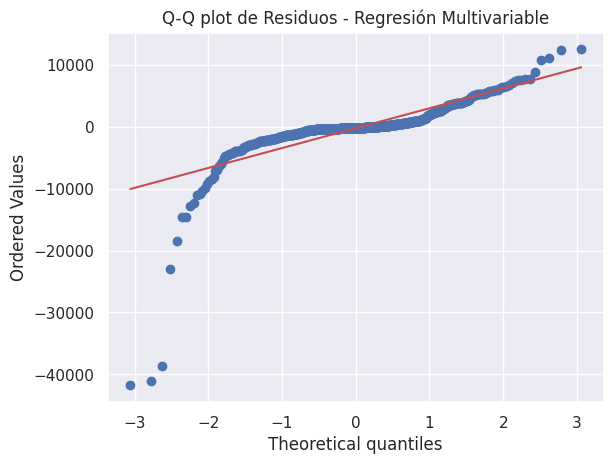

In [42]:


# Calcular los residuos multivariables
residuos_multivariable = y_test_multivariable - y_prediccion_multivariable

# Histograma de residuos
plt.hist(residuos_multivariable, bins=20, color='blue', alpha=0.7)
plt.title('Histograma de Residuos - Regresión Multivariable')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Q-Q plot de residuos
probplot(residuos_multivariable, dist="norm", plot=plt)
plt.title('Q-Q plot de Residuos - Regresión Multivariable')
plt.show()


*   **Investigar**:No entiendo por que el qqplot de el monovariable y el multivariable es igual. Cambié todas las variables y sigue dando igual.

In [43]:
from scipy.stats import shapiro

# Calcular los residuos multivariable
residuos_multivariable = y_test_multivariable - y_prediccion_multivariable

# Prueba de normalidad de Shapiro-Wilk
stat_multivariable, p_value_multivariable = shapiro(residuos_multivariable)

# Imprimir los resultados
print(f"Estadístico W = {stat_multivariable:.5f}, p-value = {p_value_multivariable:.2e}")


Estadístico W = 0.59979, p-value = 1.91e-35


El test de Shapiro-Wilk indica que los residuos del modelo no se distribuyen normal. Habria que observar los outliers y ver si tienen alguna influencia negativa sobre el modelo de  regresión lineal multivariable. O normalizar los datos y ver si siguen una distribución normal los residuos.


#### <font color='#3d59c6'>  *Homocedasticidad:*
 </font>

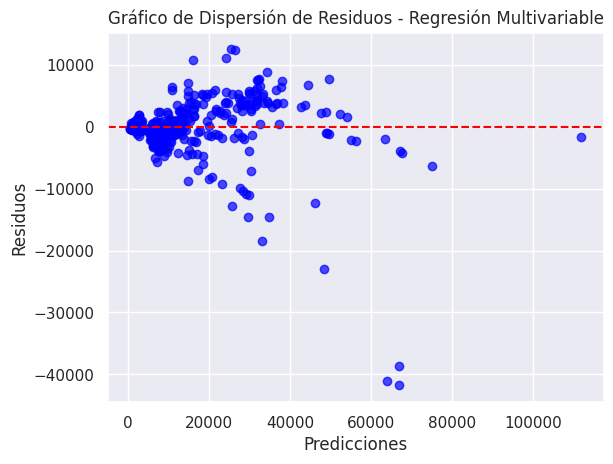

In [44]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de residuos multivariable
plt.scatter(y_prediccion_multivariable, residuos_multivariable, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Dispersión de Residuos - Regresión Multivariable')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()


In [45]:
# Añadir una columna constante a las variables independientes en el conjunto de prueba
X_test_multivariable_const = sm.add_constant(X_test_multivariable)

# Test de Breusch-Pagan multivariable
bp_test_multivariable = het_breuschpagan(residuos_multivariable, X_test_multivariable_const)

# Imprimir los resultados multivariable
names_multivariable = ['Lagrange Multiplier statistic', 'LM test p-value', 'F-statistic', 'F-test p-value']
print(list(zip(names_multivariable, bp_test_multivariable)))


[('Lagrange Multiplier statistic', 99.52144415750303), ('LM test p-value', 1.969659998237126e-21), ('F-statistic', 39.26207840384336), ('F-test p-value', 3.1556257246144753e-23)]


 El p-value del LM test, es muy cercano a cero (3.2e-23). Es decir la varianza de los errores es constante a lo largo de todas las observaciones. Lo que sugiere que hay evidencia significativa para rechazar la hipótesis nula de homocedasticidad.

#### <font color='#3d59c6'>  *Autocorrelación:*
 </font>

In [46]:
# Test de Durbin-Watson
dw_statistic_multivariable = durbin_watson(residuos_multivariable)

# Imprimir resultado
print(f'Durbin-Watson Statistic (Multivariable): {dw_statistic_multivariable}')


Durbin-Watson Statistic (Multivariable): 1.9503047481901452


 Cierta evidencia de autocorrelación positiva en los residuos ya que el valor del estadistico Durbin-Watson (1.95) es menor a "2"

#### <font color='#3d59c6'>  *Outliers:*
 </font>

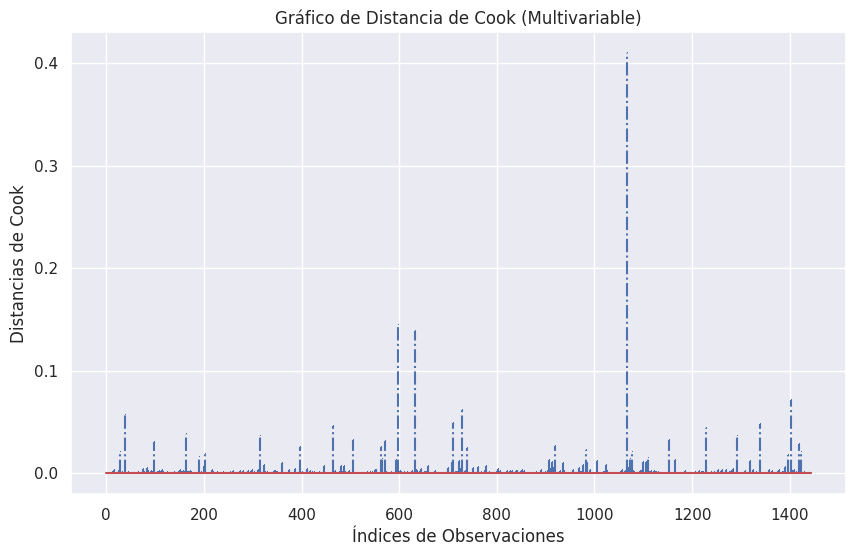

In [47]:
# Predicciones en el conjunto de entrenamiento para el modelo multivariable
y_pred_train_multivariable = modelo_regresion_multivariable.predict(X_train_multivariable)

# Crear un modelo OLS para el conjunto de entrenamiento multivariable
modelo_ols_multivariable = OLS(y_train_multivariable, X_train_multivariable).fit()

# Residuos para el conjunto de entrenamiento multivariable
residuos_multivariable = modelo_ols_multivariable.resid

# Calcular distancias de Cook multivariable
influence_multivariable = OLSInfluence(modelo_ols_multivariable)
cook_distances_multivariable = influence_multivariable.cooks_distance[0]

# Gráfico de distancia de Cook multivariable
plt.figure(figsize=(10, 6))
plt.stem(cook_distances_multivariable, markerfmt=",", linefmt="-.")
plt.title('Gráfico de Distancia de Cook (Multivariable)')
plt.xlabel('Índices de Observaciones')
plt.ylabel('Distancias de Cook')
plt.show()


Al igual que en el modelo de regresión lineal de una variable, se observan algunos outliers, pero en general las distancias de Cook no arrojan valores alarmantes.

## <font color='#3d59c6'> Regresión de Árbol de Decisión </font>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


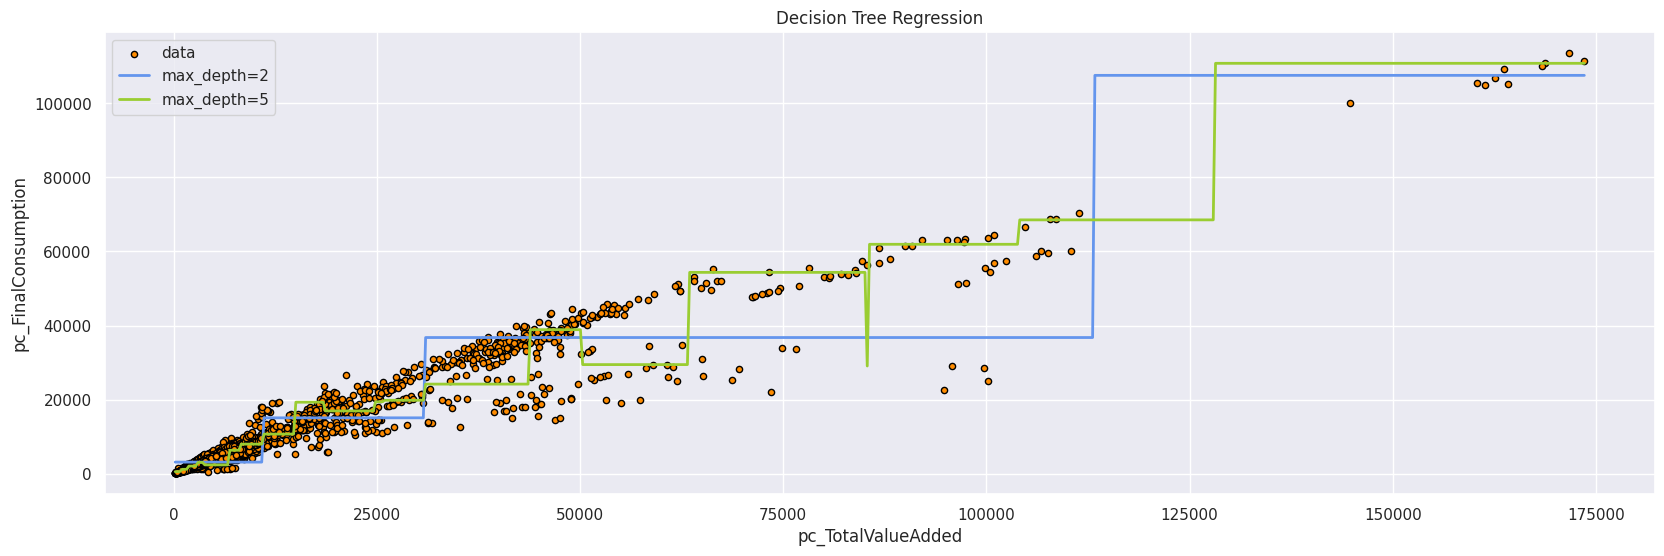

RMSE for max_depth=2: 61764.16543495541
RMSE for max_depth=5: 62640.93784748574


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [48]:


# Seleccionar variables para el modelo de árbol de decisión
X_tree = indices_pc[['pc_TotalValueAdded', 'pc_Exports', 'pcGNI']]
y_tree = indices_pc['pc_FinalConsumption']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)

# Entrenar modelos de árbol de decisión
regr_1_tree = DecisionTreeRegressor(max_depth=2)
regr_2_tree = DecisionTreeRegressor(max_depth=5)
regr_1_tree.fit(X_train_tree, y_train_tree)
regr_2_tree.fit(X_train_tree, y_train_tree)

# Generar datos para la visualización
X_test_tree = np.linspace(X_tree.min(), X_tree.max(), 620).reshape(-1, 3)

# Realizar predicciones con los modelos entrenados
y_1_tree = regr_1_tree.predict(X_test_tree)
y_2_tree = regr_2_tree.predict(X_test_tree)

# Visualizar los resultados
plt.figure(figsize=(20, 6))

# Seleccionar la variable independiente para la visualización
var_independiente = 'pc_TotalValueAdded'

plt.scatter(X_tree[var_independiente], y_tree, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test_tree[:, 0], y_1_tree, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test_tree[:, 0], y_2_tree, color="yellowgreen", label="max_depth=5", linewidth=2)

plt.xlabel(var_independiente)
plt.ylabel("pc_FinalConsumption")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Calcular RMSE para los modelos
rmse_1_tree = np.sqrt(mean_squared_error(y_test_tree, regr_1_tree.predict(X_test_tree)))
rmse_2_tree = np.sqrt(mean_squared_error(y_test_tree, regr_2_tree.predict(X_test_tree)))

print('RMSE for max_depth=2:', rmse_1_tree)
print('RMSE for max_depth=5:', rmse_2_tree)


La regresión con árboles de decisión es una técnica que divide el espacioen regiones pequeñas y ajusta una constante en cada región. Cada nodo en el árbol representa una característica y cada rama representa una condición sobre esa característica. Los árboles de decisión son útiles cuando los datos tienen relaciones no lineales o no siguen una distribución normal como es el caso del dataset que tenemos. Sin embargo es muy propenso al sobreajuste.

In [49]:


# # Seleccionar el modelo de árbol (regr_1_tree o regr_2_tree)
# selected_tree_model = regr_1_tree

# # Crear el archivo DOT para visualizar el árbol
# dot_data = export_graphviz(
#     selected_tree_model,
#     out_file=None,
#     feature_names=['pc_TotalValueAdded', 'pc_Exports', 'pcGNI'],
#     filled=True,
#     rounded=True,
# )

# # Visualizar el árbol
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree")  # Esto generará un archivo PDF llamado 'decision_tree.pdf'
# graph.view("decision_tree")


Ya que Los modelos de árboles de decisión no se expresan en forma de ecuación matemática como los anteriores, es posible observar la estructura del árbol, visualizando cómo se toman las decisiones en cada nodo.

# <font color='#3d59c6'>  CONCLUSIONES </font>

| Modelo                     | R2   | RMS  | Normalidad | Homocedasticidad | Autocorrelación | Outliers          |
|----------------------------|------|------|------------|-------------------|------------------|-------------------|
| Regresión Lineal (1 Variable) | 0.89 | 4571 | No cumple  | Si Cumple         | No hay           | No Significativo  |
| Regresión Multivariable       | 0.91 | 4161 | No cumple  | Si Cumple         | No hay           | No Significativo  |


Se observa que ambos modelos son similares en cuanto a resultados del modelo y de análisis residual. Pese a que el modelo multivariable ofrece mayor r2 y menor RMS, el modelo de 1 sola variable puede ser más sencillo de usar y aun así ofrecer valores cercanos.




* El modelado de los datos nos muestra que los indicadores macroeconómicos tienen valores demasiado variantes. No solo en un mismo país, dependiendo de la temporalidad, sino también entre todos los países.
Por esta razón, se optó por acotar el dataset y filtrar los datos por año. Periodo entre 2010 y 2019. Para ver como se comportaban los resultados, se decidió utilizar aquellas variables que tenían sentido al ser divididas por la población. Estas variables per cápita, seguían teniendo una gran variación de sus datos que tienen diferentes ordenes de magnitud. Es el caso por ejemplo de la variable "pc_export" en donde el valor mínimo per cápita es de 16.5 usd per cápita y el máximo 230655, cuatro ordenes de magnitud por encima.

Esta decisión de utilizar las variables per cápita, en vez de estandarizar los datos, seguramente tiene una gran inferencia en los modelos de regresión, de los cuales los residuos no seguían un comportamiento "normal". Intuyo que el modelo de regresiones con datos normalizados tiene un R2 similar, pero quizás un rms mucho más bajo.

Para el modelo de regresión lineal simple se tomó una variable representativa (TotalValueAdded) con alta correlación con la variable objetivo FinalConsumption. Estamos viendo entonces como se relacionan la productividad económica de un país y el consumo per cápita del mismo.

Como vimos anteriormente, explica bien la variabilidad de la variable objetivo pero el error rms es alto comparado con la media de la variable objetivo, casi 1/3.

Por otro lado, para el sistema de regresión lineal multivariable, introdujimos una variable categórica basada en los ingresos per cápita y los umbrales de pobreza/riqueza establecidos por el World bank. Con esta variable observamos si tenía una incidencia significativa en los datos de FinalConsuption.

también se hizo un análisis PCA para identificar que componentes tienen capacidad de explicar mejor la variable objetivo. Dentro de estos componentes se escogieron las variables más relevantes para hacer el modelo de regresión lineal multivariable.

Los resultados fueron muy similares entre las dos regresiones mencionadas, por lo que se optó por tomar el modelo de regresión lineal simple que solo necesita de una variable para predecir.

Finalmente, se realizó otro modelo de regresión por árbol de decisión. Se observa que explica bien la función, pero hay o mucho overfiting o mucha perdida de información.






# <font color='#3d59c6'>  CLASIFICACIÓN </font>

## <font color='#3d59c6'>  Clasificación Original </font>

In [107]:
indices_no_borrados = indices_anova.copy()

In [108]:
indices_no_borrados.columns


Index(['pcGNI', 'pc_Agriculture', 'pc_Construction', 'pc_Exports',
       'pc_GovtConsumption', 'pc_GrossCapFormation',
       'pc_GrossFixedCapFormation', 'pc_HouseholdConsumption', 'pc_Imports',
       'pc_Manufacturing', 'pc_Mining', 'pc_OtherActivities',
       'pc_TotalValueAdded', 'pc_Transport', 'pc_Wholesale', 'pc_GDP',
       'pc_FinalConsumption', 'ingresos'],
      dtype='object')

In [109]:
from sklearn.model_selection import train_test_split

# Seleccionando los datos para entrenamiento y el atributo objetivo
X_data = indices_no_borrados.drop(columns=['ingresos']).values
y_class = indices_no_borrados['ingresos'].astype(int).values

# La partición se realiza 80% entrenamiento y 20% de validación
X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_class, test_size=0.2, random_state=42)

print("Tamaño dataset entrenamiento:", X_train.shape)
print("Tamaño dataset validación:", X_test.shape)


Tamaño dataset entrenamiento: (1651, 17)
Tamaño dataset validación: (413, 17)


In [110]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Seleccionando los datos para el clustering
# X_data_clustering = indices_no_borrados.drop(columns=['ingresos']).values

# # Generación de 'k' modelos KMeans para el cálculo de inercias, con todo el dataset conjuntamente
# kmeans_model_list = [KMeans(n_clusters=k, random_state=4, n_init=10).fit(X_data_clustering) for k in range(1, 20)]

# # Cálculo de la inercia por cada modelo generado previamente. El resultado es un vector que se dibujará para analizar el codo
# inertias = [model.inertia_ for model in kmeans_model_list]

# # Caracterización de la figura a mostrar
# plt.figure(figsize=(8, 3.5))

# # Visualización del rango de inercias de color azul, marcando los puntos y uniendo con línea
# plt.plot(range(1, 20), inertias, "ko-")

# # Etiquetas ejes horizontal y vertical
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Inertia", fontsize=14)

# # Mostrar la figura
# plt.show()


In [114]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans

# Generación del modelo con 2 clústeres y predicción
kmeans_index_complete = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X_train)

# Predicciones
pred_kmeans_index_complete = kmeans_index_complete.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(Y_test, pred_kmeans_index_complete)

# Extraer los elementos de la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()

# Calcular precision, sensibilidad, especificidad y F1
precision = precision_score(Y_test, pred_kmeans_index_complete)
sensibilidad = recall_score(Y_test, pred_kmeans_index_complete)
especificidad = tn / (tn + fp)
f1 = f1_score(Y_test, pred_kmeans_index_complete)

# Mostrar los resultados
print("Matriz de Confusión:")
print(conf_matrix)
print(f'Precision: {precision:.2f}')
print(f'Sensibilidad: {sensibilidad:.2f}')
print(f'Especificidad: {especificidad:.2f}')
print(f'F1 Score: {f1:.2f}')


Matriz de Confusión:
[[199   0]
 [152  62]]
Precision: 1.00
Sensibilidad: 0.29
Especificidad: 1.00
F1 Score: 0.45


## <font color='#3d59c6'>  Clasificación Datos Borrados </font>

In [130]:
# Copiar el dataframe original
indices_missing = indices_anova.copy()

# Obtener el 10% de las filas aleatorias para reemplazar
filas_a_reemplazar = indices_missing.sample(frac=0.1).index

# Reemplazar el 10% de los datos en la columna pc_FinalConsumption con espacios vacíos
indices_missing.loc[filas_a_reemplazar, 'pc_FinalConsumption'] = np.nan



In [131]:
from sklearn.model_selection import train_test_split

# Seleccionando los datos para entrenamiento y el atributo objetivo
X_data_missing = indices_missing.drop(columns=['ingresos']).values
y_class_missing = indices_missing['ingresos'].astype(int).values

# La partición se realiza 80% entrenamiento y 20% de validación
X_train_missing, X_test_missing, Y_train_missing, Y_test_missing = train_test_split(X_data_missing, y_class_missing, test_size=0.2, random_state=42)

print("Tamaño dataset entrenamiento con valores faltantes:", X_train_missing.shape)
print("Tamaño dataset validación con valores faltantes:", X_test_missing.shape)


Tamaño dataset entrenamiento con valores faltantes: (1651, 17)
Tamaño dataset validación con valores faltantes: (413, 17)


In [132]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans

# Generación del modelo con 2 clústeres y predicción
kmeans_missing_data = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X_train_missing)

# Predicciones
pred_kmeans_missing_data = kmeans_missing_data.predict(X_test_missing)

# Matriz de confusión
conf_matrix_missing_data = confusion_matrix(Y_test_missing, pred_kmeans_missing_data)

# Extraer los elementos de la matriz de confusión
tn_missing_data, fp_missing_data, fn_missing_data, tp_missing_data = conf_matrix_missing_data.ravel()

# Calcular precision, sensibilidad, especificidad y F1
precision_missing_data = precision_score(Y_test_missing, pred_kmeans_missing_data)
sensibilidad_missing_data = recall_score(Y_test_missing, pred_kmeans_missing_data)
especificidad_missing_data = tn_missing_data / (tn_missing_data + fp_missing_data)
f1_missing_data = f1_score(Y_test_missing, pred_kmeans_missing_data)

# Mostrar los resultados
print("Matriz de Confusión con Datos Faltantes:")
print(conf_matrix_missing_data)
print(f'Precision: {precision_missing_data:.2f}')
print(f'Sensibilidad: {sensibilidad_missing_data:.2f}')
print(f'Especificidad: {especificidad_missing_data:.2f}')
print(f'F1 Score: {f1_missing_data:.2f}')


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## <font color='#3d59c6'>  Clasificación Datos Sintéticos </font>

In [133]:


# Crear una copia del DataFrame para evitar modificar el original
df_filled = indices_anova.copy()

# Obtener las filas con valores NaN en 'pc_FinalConsumption'
nan_rows = df_filled[df_filled['pc_FinalConsumption'].isna()]

# Rellenar los valores NaN en 'pc_FinalConsumption' usando la ecuación de tu modelo
df_filled.loc[nan_rows.index, 'pc_FinalConsumption'] = (
    1604.7388832137203 + 0.6600661879317066 * nan_rows['pc_TotalValueAdded']
)

# Ahora, df_filled tiene los valores NaN en 'pc_FinalConsumption' reemplazados


In [134]:

# Seleccionar los datos para entrenamiento y el atributo objetivo
X_data = df_filled.drop(columns=['ingresos', 'pc_FinalConsumption']).values
y_class = df_filled['ingresos'].astype(int).values

# La partición se realiza 80% entrenamiento y 20% de validación
X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_class, test_size=0.2, random_state=42)

print("Tamaño dataset entrenamiento:", X_train.shape)
print("Tamaño dataset validación:", X_test.shape)


Tamaño dataset entrenamiento: (1651, 16)
Tamaño dataset validación: (413, 16)


In [136]:


# Generación del modelo con 2 clústeres y predicción
kmeans_index_complete = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X_train)

# Predicciones
pred_kmeans_index_complete = kmeans_index_complete.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(Y_test, pred_kmeans_index_complete)

# Extraer los elementos de la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()

# Calcular precision, sensibilidad, especificidad y F1
precision = precision_score(Y_test, pred_kmeans_index_complete)
sensibilidad = recall_score(Y_test, pred_kmeans_index_complete)
especificidad = tn / (tn + fp)
f1 = f1_score(Y_test, pred_kmeans_index_complete)

# Mostrar los resultados
print("Matriz de Confusión:")
print(conf_matrix)
print(f'Precision: {precision:.2f}')
print(f'Sensibilidad: {sensibilidad:.2f}')
print(f'Especificidad: {especificidad:.2f}')
print(f'F1 Score: {f1:.2f}')

Matriz de Confusión:
[[199   0]
 [154  60]]
Precision: 1.00
Sensibilidad: 0.28
Especificidad: 1.00
F1 Score: 0.44


## <font color='#3d59c6'>  Comparación </font>

Se utilizó el método kmeans para hacer la clasificación, especificando que hay dos clusters. Luego de comparar los resultados del modelo original y el modelo con los datos sintéticos, se observa que no hay gran diferencia en la matriz de confusión y las métricas. Sin embargo, el método con datos sintéticos es muy similar.

Presentó una alta precisión y especificidad.

Una baja mínima en la sensibilidad y f1 score.

En general, no se obtienen buenos resultados de f1 score. Una mejora del modelo de regresión haciendo una estandarización de los datos, puede que mejore también los valores de sensibilidad y f1 score. Ya que el modelo de regresión se había hecho con valores per cápita, tocaba hacer estas comparativas con el mismo dataset.

Cabe resaltar que el modelo kmeans no permite valores "NA", así que es mejor utilizar otro método de clasificación para poder hacer la comparativa de los 3 ejemplos. Como por ejemplo los árboles de decisión, bosques o los modelos de Gradient Boosting.

En conclusión, la regresión lineal sirve para generar esos valores sintéticos que pueden faltar en el dataset y obtener aun así resultados de clasificación similares.
